In [1]:
import pandas as pd
import numpy as np

In [2]:
# cd /home/anshul/Desktop/Data_Science_Project/dataset/NTU_DATA
import os
os.chdir('/home/ubuntu/NTU_DATA')

!pwd

/home/ubuntu/NTU_DATA


In [3]:
def read_degs(file_path, priority='Top'):
    deg_df = pd.read_csv(file_path)
    significant_degs = deg_df[(deg_df["Adjusted P-value"] < 0.01)]
    significant_degs = significant_degs.sort_values(by="T-statistic", ascending=False)
    significant_genes = significant_degs["HGNC_symbol"]
    if priority == "Top":
        upregulated_degs = significant_degs.sort_values(by='T-statistic', ascending=False).head(100)
        downregulated_degs = significant_degs.sort_values(by='T-statistic').head(100)
        top_degs = pd.concat([upregulated_degs, downregulated_degs])
        top_genes = top_degs["HGNC_symbol"]
        return list(set(top_genes))

    return list(set(significant_genes))

## Subtype - PAAD

In [4]:
PAAD_top_degs = read_degs("../project/dsmp-2024-groupm22/files/PAAD_results.csv")

In [5]:
PAAD_top_tfs = ['EP300', 'TCF12', 'POLR2A', 'STAT3', 'SIN3A', 'REST', 'BACH1', 'RFX5', 'FOXP2', 'SMC3']

In [6]:
selected_features = list(set(PAAD_top_degs) | set(PAAD_top_tfs))
# selected_features = list(set(PAAD_top_tfs))

In [7]:
PAAD_gene_expression_levels = pd.read_csv('Gene-Expression-Levels/TOIL_RSEM_TPM_PAAD.csv', low_memory=False, index_col=1)
PAAD_gene_expression_levels = PAAD_gene_expression_levels.drop(columns="Unnamed: 0")

In [8]:
PAAD_integrated_expressions_df = PAAD_gene_expression_levels.loc[PAAD_gene_expression_levels.index.intersection(selected_features)]

In [9]:
PAAD_integrated_expressions_df.head()

,TCGA_HZ_7922,TCGA_Q3_A5QY,TCGA_FB_A545,TCGA_RL_AAAS,TCGA_F2_7276,TCGA_FB_A7DR,TCGA_YB_A89D,TCGA_IB_7889,TCGA_IB_7890,TCGA_OE_A75W,...,TCGA_LB_A9Q5,TCGA_IB_A5SO,TCGA_LB_A7SX,TCGA_HV_AA8X,TCGA_HZ_A77O,TCGA_IB_AAUN,TCGA_HZ_7918,TCGA_2L_AAQI,TCGA_2J_AABK,TCGA_IB_7885
HGNC_symbol,,,,,,,,,,,,,,,,,,,,,
GAS7,4.2064,2.7721,2.6805,3.4739,4.2533,3.9412,3.8105,2.6487,4.3285,1.9786,...,1.9073,4.0471,1.9034,2.6693,1.5612,2.7336,4.1515,2.6670,1.5514,3.3364
SLC25A39,6.7404,6.5703,7.6775,6.5838,6.2485,6.9448,7.0320,6.7065,6.6928,7.5984,...,6.3512,6.6047,7.4646,6.8981,7.0394,6.9721,6.0779,6.9085,7.3190,7.0219
PREX2,0.5370,-0.1993,0.2642,0.0440,1.6964,1.0293,0.5069,-0.3752,1.2455,-0.5543,...,-1.3183,1.1447,-1.5105,-1.1172,-1.8314,0.0718,0.8082,0.1388,-0.4921,0.6145
DKK3,7.4430,5.6957,6.4048,6.5835,6.7483,7.6579,7.3437,6.1585,8.4698,6.5574,...,4.2381,7.1842,5.1607,6.2151,5.3024,6.3327,6.7204,5.7589,4.8963,6.3484
RPL18,10.8169,11.5744,11.1321,11.3298,10.5514,10.4172,11.0400,11.0836,10.5259,11.9379,...,10.2675,10.8016,10.7920,10.5982,10.9262,10.4864,10.2642,10.8137,10.9107,10.5046


In [10]:
PAAD_integrated_features = PAAD_integrated_expressions_df.T
PAAD_integrated_features.head()

HGNC_symbol,GAS7,SLC25A39,PREX2,DKK3,RPL18,ABCC9,LLGL2,FERMT2,CAMSAP3,FKBP7,...,RPL21P96,ARHGEF25,MIF,MCRIP2P1,MNX1-AS1,PABPC1P4,HMGA1P3,PDF,LINC02473,GTF2IP13
TCGA_HZ_7922,4.2064,6.7404,0.5370,7.4430,10.8169,2.9071,5.1086,5.4456,1.8801,4.9700,...,-9.9658,4.7187,7.3760,-3.6259,-0.7108,1.2023,-9.9658,-0.0725,-6.5064,-1.3548
TCGA_Q3_A5QY,2.7721,6.5703,-0.1993,5.6957,11.5744,0.6517,5.7952,4.1652,0.7748,3.5124,...,-9.9658,3.3745,8.6636,-3.3076,-2.1779,-0.7108,-9.9658,0.9038,-6.5064,1.4808
TCGA_FB_A545,2.6805,7.6775,0.2642,6.4048,11.1321,1.1447,7.7399,4.3814,4.5324,4.0549,...,-9.9658,3.7804,10.2060,-1.0262,1.0779,-0.8084,-1.0262,2.3677,-9.9658,2.8622
TCGA_RL_AAAS,3.4739,6.5838,0.0440,6.5835,11.3298,1.7446,6.0213,3.9874,3.2359,4.4881,...,-9.9658,4.2766,8.8284,-2.8262,1.2756,0.6969,-9.9658,1.8564,-4.6082,0.8568
TCGA_F2_7276,4.2533,6.2485,1.6964,6.7483,10.5514,2.5780,5.8500,5.9917,2.7594,4.6124,...,-9.9658,3.9299,7.1431,-9.9658,0.2762,0.8082,-9.9658,1.1706,-6.5064,-0.3752


In [11]:
PAAD_integrated_features.shape

(178, 210)

In [12]:
PAAD_average_methylation = pd.read_csv("../project/dsmp-2024-groupm22/files/PAAD_average_methylation.csv", index_col=0)

In [13]:
PAAD_average_methylation_series = PAAD_average_methylation.iloc[:, 0]

In [14]:
PAAD_average_methylation_series.index = PAAD_average_methylation_series.index.str.replace("-01", "", regex=False).str.replace("-", "_", regex=False)

In [15]:
PAAD_average_methylation_series

TCGA_S4_A8RP    0.563003
TCGA_IB_A6UG    0.531590
TCGA_US_A776    0.236833
TCGA_FZ_5926    0.575374
TCGA_HZ_A8P1    0.547035
                  ...   
TCGA_M8_A5N4    0.581039
TCGA_IB_7893    0.458516
TCGA_HV_A5A4    0.510503
TCGA_HZ_8005    0.514926
TCGA_Z5_AAPL    0.637668
Name: 0, Length: 195, dtype: float64

In [16]:
PAAD_common_smaples = PAAD_integrated_features.index.intersection(PAAD_average_methylation_series.index)
len(PAAD_common_smaples)

178

In [17]:
# PAAD_final_features = pd.merge(PAAD_integrated_features, 
#                           PAAD_average_methylation_series.rename("Promoter_Methylation"), 
#                           left_index=True, right_index=True, how='inner')

In [18]:
PAAD_final_features = PAAD_integrated_features

In [19]:
PAAD_final_features.shape

(178, 210)

In [20]:
PAAD_cancer_samples = list(PAAD_final_features.index)

In [21]:
PAAD_final_features.head()

HGNC_symbol,GAS7,SLC25A39,PREX2,DKK3,RPL18,ABCC9,LLGL2,FERMT2,CAMSAP3,FKBP7,...,RPL21P96,ARHGEF25,MIF,MCRIP2P1,MNX1-AS1,PABPC1P4,HMGA1P3,PDF,LINC02473,GTF2IP13
TCGA_HZ_7922,4.2064,6.7404,0.5370,7.4430,10.8169,2.9071,5.1086,5.4456,1.8801,4.9700,...,-9.9658,4.7187,7.3760,-3.6259,-0.7108,1.2023,-9.9658,-0.0725,-6.5064,-1.3548
TCGA_Q3_A5QY,2.7721,6.5703,-0.1993,5.6957,11.5744,0.6517,5.7952,4.1652,0.7748,3.5124,...,-9.9658,3.3745,8.6636,-3.3076,-2.1779,-0.7108,-9.9658,0.9038,-6.5064,1.4808
TCGA_FB_A545,2.6805,7.6775,0.2642,6.4048,11.1321,1.1447,7.7399,4.3814,4.5324,4.0549,...,-9.9658,3.7804,10.2060,-1.0262,1.0779,-0.8084,-1.0262,2.3677,-9.9658,2.8622
TCGA_RL_AAAS,3.4739,6.5838,0.0440,6.5835,11.3298,1.7446,6.0213,3.9874,3.2359,4.4881,...,-9.9658,4.2766,8.8284,-2.8262,1.2756,0.6969,-9.9658,1.8564,-4.6082,0.8568
TCGA_F2_7276,4.2533,6.2485,1.6964,6.7483,10.5514,2.5780,5.8500,5.9917,2.7594,4.6124,...,-9.9658,3.9299,7.1431,-9.9658,0.2762,0.8082,-9.9658,1.1706,-6.5064,-0.3752


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import pandas as pd

def pca_comparision(combined_final_features: pd.DataFrame, cancer_samples: list, normal_samples: list, keyword: str):
    all_samples = set(combined_final_features.index)
    assert set(cancer_samples).issubset(all_samples), "Some cancer samples not in the dataframe!"
    assert set(normal_samples).issubset(all_samples), "Some normal samples not in the dataframe!"

    labels = []
    for sample in combined_final_features.index:
        if sample in cancer_samples:
            labels.append("Cancer")
        elif sample in normal_samples:
            labels.append("Normal")
        else:
            labels.append("Unknown") 

    scaler = StandardScaler()
    combined_scaled = scaler.fit_transform(combined_final_features)

    iso_forest = IsolationForest(contamination=0.02, random_state=42)
    outlier_labels = iso_forest.fit_predict(combined_scaled)
    inlier_mask = outlier_labels == 1
    combined_scaled = combined_scaled[inlier_mask]
    labels = [labels[i] for i in range(len(labels)) if inlier_mask[i]]

    pca = PCA(n_components=2)
    combined_pca = pca.fit_transform(combined_scaled)
    explained_variance = pca.explained_variance_ratio_
    print(f"{keyword} Cancer vs Normal PCA% : {explained_variance}")

    pca_df = pd.DataFrame(combined_pca, columns=["PC1", "PC2"])
    pca_df["Group"] = labels

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Group", palette="Set2", s=60, edgecolor="w")
    plt.title(f"PCA of {keyword} Cancer + Normal Samples (Integrated Features)")
    plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}% Variance)")
    plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}% Variance)")
    plt.legend(title="Tissue Type")
    plt.tight_layout()
    plt.savefig(f"../project/dsmp-2024-groupm22/plots/{keyword}_VS_normal_PCA_plot.png", dpi=300)
    plt.show()

    return pca_df, explained_variance


In [23]:
survival_df = pd.read_csv("Survival_SupplementalTable_S1_20171025_xena_sp", sep='\t', low_memory=False)
survival_df.shape

(12591, 34)

In [24]:
! pip install lifelines

In [25]:
from lifelines import CoxPHFitter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def cox_model(survival_df, final_features):
    merged_df = survival_df.copy()
    merged_df["_PATIENT"] = merged_df["_PATIENT"].str.replace("-", "_")
    merged_df = merged_df.set_index("_PATIENT").join(final_features, how="inner")
    merged_df = merged_df.dropna(subset=["OS", "OS.time"])
    
    # Step 2: Standardize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(merged_df[final_features.columns])
    
    # Step 3: Reduce features with PCA
    pca = PCA(n_components=15, random_state=42)
    pca_features = pca.fit_transform(scaled_features)
    
    # Step 4: Build final Cox DataFrame
    cox_df = pd.DataFrame(pca_features, index=merged_df.index, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
    cox_df["time"] = merged_df["OS.time"]
    cox_df["event"] = merged_df["OS"]
    
    # Step 5: Fit Cox model with L2 regularization
    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(cox_df, duration_col="time", event_col="event")
    cph.print_summary()

    return cox_df


In [26]:
PAAD_cox_df = cox_model(survival_df, PAAD_final_features)

<lifelines.CoxPHFitter: fitted with 183 total observations, 88 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 183
number of events observed = 95
   partial log-likelihood = -407.13
         time fit was run = 2025-04-26 18:54:56 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
PC1        0.00      1.00      0.01           -0.02            0.02                0.98                1.02
PC2       -0.00      1.00      0.02           -0.04            0.03                0.96                1.03
PC3        0.14      1.16      0.04            0.07            0.22                1.07                1.24
PC4       -0.13      0.88      0.05           -0.22           -0.04                0.80                0.96
PC5        0.04      1.04      0.05           -0.05            0.13                0.95                1.14
PC6        0.02      1.02      0.05           -0.08            0.12                0.93                1.13
PC7       -0.08      0.93      0.05           -0.18            0.03                0.84                1.03
PC8       -0.05      0.95      0.06           -0.16            0.06                0.85                1.06
PC9        0.05      1.05      0.06           -0.06            0.16                0.94                1.18
PC10       0.00      1.00      0.06           -0.12            0.13                0.88                1.14
PC11      -0.10      0.90      0.07           -0.24            0.04                0.79                1.04
PC12       0.02      1.02      0.07           -0.13            0.16                0.88                1.17
PC13      -0.02      0.98      0.07           -0.16            0.12                0.85                1.13
PC14      -0.04      0.96      0.07           -0.18            0.10                0.84                1.10
PC15       0.09      1.09      0.08           -0.07            0.24                0.93                1.27

           cmp to     z      p  -log2(p)
covariate                               
PC1          0.00  0.25   0.80      0.32
PC2          0.00 -0.29   0.77      0.38
PC3          0.00  3.84 <0.005     13.01
PC4          0.00 -2.78   0.01      7.51
PC5          0.00  0.85   0.39      1.34
PC6          0.00  0.47   0.64      0.64
PC7          0.00 -1.44   0.15      2.75
PC8          0.00 -0.90   0.37      1.44
PC9          0.00  0.88   0.38      1.39
PC10         0.00  0.06   0.95      0.07
PC11         0.00 -1.43   0.15      2.72
PC12         0.00  0.21   0.83      0.26
PC13         0.00 -0.27   0.78      0.35
PC14         0.00 -0.55   0.58      0.78
PC15         0.00  1.10   0.27      1.87
---
Concordance = 0.50
Partial AIC = 844.26
log-likelihood ratio test = 33.96 on 15 df
-log2(p) of ll-ratio test = 8.18

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, statistics

def kalpan_meier_survival_curve(cox_df, keyword):
    sns.set(style="whitegrid")
    
    cox_df['PC3_group'] = ['High' if x >= cox_df['PC3'].median() else 'Low' for x in cox_df['PC3']]
    
    kmf_high = KaplanMeierFitter()
    kmf_low = KaplanMeierFitter()
    
    high_group = cox_df[cox_df['PC3_group'] == 'High']
    low_group = cox_df[cox_df['PC3_group'] == 'Low']
    
    kmf_high.fit(high_group['time'], event_observed=high_group['event'], label="High PC3")
    kmf_low.fit(low_group['time'], event_observed=low_group['event'], label="Low PC3")

    results = statistics.logrank_test(
        high_group['time'], low_group['time'],
        event_observed_A=high_group['event'],
        event_observed_B=low_group['event']
    )
    
    print(f"Log-rank test p-value: {results.p_value:.4f}")
    
    plt.figure(figsize=(9, 6))
    ax = kmf_high.plot(ci_show=True, linewidth=2, color="#1f77b4")  # blue
    kmf_low.plot(ci_show=True, linewidth=2, color="#ff7f0e", ax=ax)  # orange
    
    plt.title(f"Kaplan-Meier Survival Curve by PC3 Group for {keyword}", fontsize=14)
    plt.xlabel("Survival Time (days)", fontsize=12)
    plt.ylabel("Survival Probability", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Group", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    sns.despine()
    plt.tight_layout()
    plt.savefig(f"../project/dsmp-2024-groupm22/plots/{keyword}_PC3_KaplanMeier_plot_seaborn.png", dpi=300)
    plt.show()


Log-rank test p-value: 0.0116


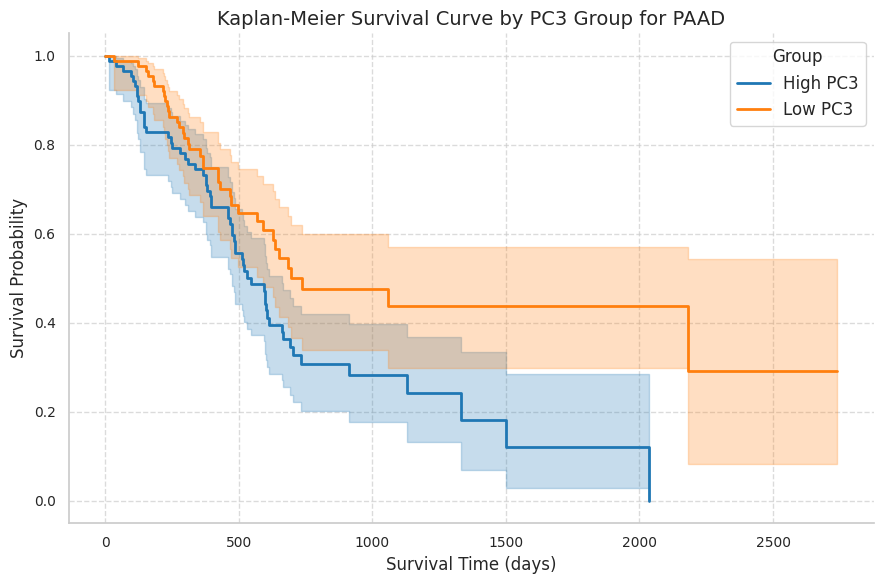

In [28]:
kalpan_meier_survival_curve(PAAD_cox_df, "PAAD")

## Subtype - SKCM

In [29]:
SKCM_top_degs = read_degs("../project/dsmp-2024-groupm22/files/SKCM_results.csv")


In [30]:
SKCM_top_tfs = ['BACH1', 'TCF12', 'REST', 'CHD2', 'TAF1', 'CTCF', 'STAT3', 'YY1', 'SIN3A', 'ZNF143']


In [31]:
selected_features = list(set(SKCM_top_degs) | set(SKCM_top_tfs))
# selected_features = list(set(SKCM_top_tfs))


In [32]:
SKCM_gene_expression_levels = pd.read_csv('Gene-Expression-Levels/TOIL_RSEM_TPM_SKCM.csv', low_memory=False, index_col=1)
SKCM_gene_expression_levels = SKCM_gene_expression_levels.drop(columns="Unnamed: 0")

In [33]:
SKCM_integrated_expressions_df = SKCM_gene_expression_levels.loc[SKCM_gene_expression_levels.index.intersection(selected_features)]


In [34]:
SKCM_integrated_features = SKCM_integrated_expressions_df.T
SKCM_integrated_features.head()

HGNC_symbol,MAD1L1,SPPL2B,UQCRC1,QPCTL,SLC25A39,PHLDB1,RUNX3,SNX1,FUT8,RTN4R,...,PRR5-ARHGAP8,GDNF-AS1,CHCHD10,LINC02552,LINC00520,CSPG4P12,MRPL12,LINC02104,CSPG4P5,GLIDR
TCGA_EB_A41A,7.0250,4.6053,8.1740,4.5417,6.9329,5.8365,5.7634,5.9584,1.9111,0.1648,...,-0.0574,0.6517,3.7116,-3.8160,0.4865,-1.0862,5.9279,0.8647,-4.6082,-0.1665
TCGA_XV_AAZW,7.6791,5.4712,7.9767,4.0636,7.5312,6.9755,4.0198,6.7266,2.7993,1.9452,...,-1.8314,0.0158,5.5744,2.6670,3.0688,-0.3940,7.1761,1.8119,-5.5735,0.7916
TCGA_BF_A5ER,8.0605,3.7720,8.2872,5.2544,7.7332,4.6159,5.3951,5.4327,1.1117,4.4257,...,1.4120,-9.9658,7.7205,-9.9658,3.4635,-2.9324,7.4382,-4.2934,-5.5735,0.9115
TCGA_EB_A6QZ,7.1633,5.2601,7.5960,3.6994,6.6577,6.4270,3.9682,6.6959,2.8582,2.6278,...,-4.2934,1.2992,6.2011,6.1807,4.9964,-0.5543,6.7923,1.3623,-2.7274,2.1509
TCGA_EB_A1NK,8.5597,4.2676,8.4649,5.5617,8.0105,5.9093,5.5853,5.5441,2.8178,3.2496,...,-2.5479,-3.3076,8.3252,-4.6082,2.0147,-2.2447,7.1985,-2.5479,-3.4580,-0.3566


In [35]:
SKCM_average_methylation = pd.read_csv("../project/dsmp-2024-groupm22/files/SKCM_average_methylation.csv", index_col=0)
SKCM_average_methylation_series = SKCM_average_methylation.iloc[:, 0]
SKCM_average_methylation_series.index = SKCM_average_methylation_series.index.str.replace("-01", "", regex=False).str.replace("-", "_", regex=False)


In [36]:
# SKCM_common_smaples = SKCM_integrated_features.index.intersection(SKCM_average_methylation_series.index)
# len(SKCM_common_smaples)

In [37]:
# SKCM_final_features = pd.merge(SKCM_integrated_features, 
#                           SKCM_average_methylation_series.rename("Promoter_Methylation"), 
#                           left_index=True, right_index=True, how='inner')

In [38]:
SKCM_final_features = SKCM_integrated_features

In [39]:
SKCM_cancer_samples = list(SKCM_final_features.index)

In [40]:
SKCM_cox_df = cox_model(survival_df, SKCM_final_features)

<lifelines.CoxPHFitter: fitted with 104 total observations, 74 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 104
number of events observed = 30
   partial log-likelihood = -104.41
         time fit was run = 2025-04-26 18:54:59 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
PC1        0.01      1.01      0.02           -0.02            0.05                0.98                1.05
PC2       -0.02      0.98      0.04           -0.10            0.05                0.91                1.05
PC3       -0.01      0.99      0.05           -0.11            0.10                0.90                1.10
PC4        0.06      1.06      0.06           -0.05            0.17                0.95                1.19
PC5        0.10      1.11      0.07           -0.03            0.23                0.97                1.26
PC6        0.04      1.04      0.08           -0.11            0.19                0.90                1.21
PC7        0.08      1.08      0.08           -0.09            0.24                0.92                1.27
PC8       -0.02      0.98      0.08           -0.18            0.14                0.84                1.15
PC9       -0.16      0.86      0.08           -0.32            0.01                0.73                1.01
PC10       0.12      1.13      0.08           -0.04            0.28                0.96                1.32
PC11       0.07      1.07      0.10           -0.13            0.26                0.88                1.30
PC12      -0.01      0.99      0.09           -0.18            0.17                0.83                1.18
PC13      -0.06      0.94      0.11           -0.27            0.15                0.76                1.16
PC14      -0.02      0.98      0.10           -0.22            0.18                0.80                1.20
PC15       0.09      1.09      0.10           -0.11            0.28                0.90                1.33

           cmp to     z    p  -log2(p)
covariate                             
PC1          0.00  0.69 0.49      1.02
PC2          0.00 -0.62 0.53      0.90
PC3          0.00 -0.14 0.89      0.17
PC4          0.00  1.04 0.30      1.75
PC5          0.00  1.57 0.12      3.09
PC6          0.00  0.55 0.58      0.78
PC7          0.00  0.93 0.35      1.50
PC8          0.00 -0.26 0.80      0.33
PC9          0.00 -1.87 0.06      4.01
PC10         0.00  1.46 0.15      2.78
PC11         0.00  0.69 0.49      1.04
PC12         0.00 -0.08 0.93      0.10
PC13         0.00 -0.58 0.56      0.83
PC14         0.00 -0.18 0.85      0.23
PC15         0.00  0.88 0.38      1.40
---
Concordance = 0.50
Partial AIC = 238.82
log-likelihood ratio test = 11.50 on 15 df
-log2(p) of ll-ratio test = 0.48

Log-rank test p-value: 0.9456


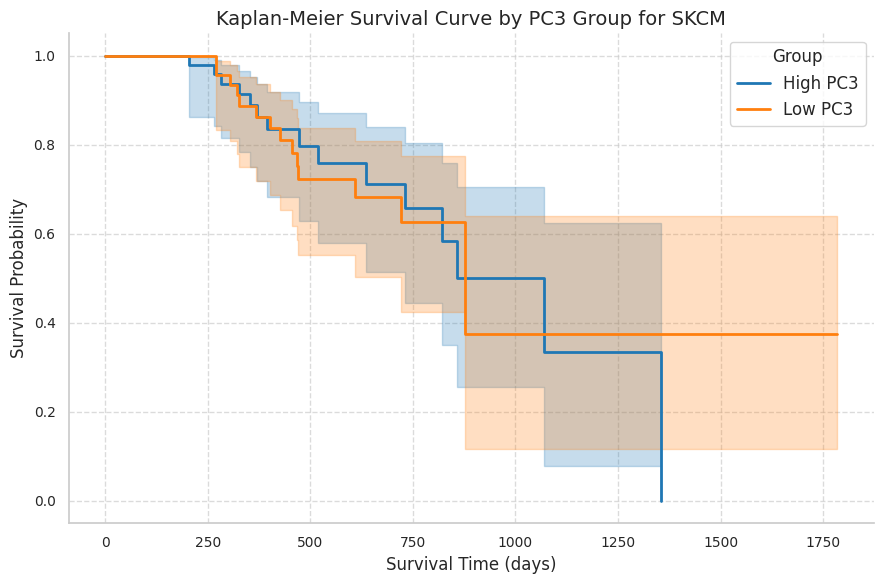

In [41]:
kalpan_meier_survival_curve(SKCM_cox_df, "SKCM")

## Subtype - LUAD

In [42]:
LUAD_top_degs = read_degs("../project/dsmp-2024-groupm22/files/LUAD_results.csv")


In [43]:
LUAD_top_tfs = ['TCF12', 'BACH1', 'FOSL2', 'REST']


In [44]:
selected_features = list(set(LUAD_top_degs) | set(LUAD_top_tfs))
# selected_features = list(set(LUAD_top_tfs))

In [45]:
LUAD_gene_expression_levels = pd.read_csv('Gene-Expression-Levels/TOIL_RSEM_TPM_LUAD.csv', low_memory=False, index_col=1)
LUAD_gene_expression_levels = LUAD_gene_expression_levels.drop(columns="Unnamed: 0")

In [46]:
LUAD_integrated_expressions_df = LUAD_gene_expression_levels.loc[LUAD_gene_expression_levels.index.intersection(selected_features)]


In [47]:
LUAD_integrated_features = LUAD_integrated_expressions_df.T
LUAD_integrated_features.head()

HGNC_symbol,GAS7,DCN,SNAI2,FAS,TIMP2,DKK3,CDK14,MYLK,NAV3,IRAG1,...,SMIM3,CNPY2,LINC02894,SPON1,MRPS21,NDUFA7,MAGIX,MAP7-AS1,PAXIP1-DT,SEPSECS-AS1
TCGA_44_6778,3.7105,8.5880,2.1280,4.1875,7.0970,6.0579,3.1540,5.3954,1.2209,1.4388,...,3.1212,6.7799,0.8246,3.8857,5.9577,5.5460,0.8246,-0.8599,2.1114,0.4761
TCGA_05_4420,0.8246,7.9856,2.2663,1.8604,5.9607,4.4317,1.3623,3.8116,-4.2934,1.8119,...,3.6950,9.3152,0.2998,3.3883,5.3927,7.3383,2.9013,0.1648,2.7095,0.2998
TCGA_64_1679,3.2572,9.2946,3.5911,4.7399,8.7082,7.1761,4.0287,5.8125,0.0300,3.3032,...,4.9603,6.8888,-1.2481,4.6781,4.7934,5.7530,2.4805,-2.4659,1.0433,0.8164
TCGA_49_6744,3.1095,8.8060,3.2080,4.3576,7.5185,5.7837,2.8819,5.4016,0.0014,2.7826,...,4.6381,7.2097,-0.8863,4.4868,5.5457,5.8773,2.5658,-1.2481,2.0004,1.3511
TCGA_55_6982,3.5706,9.0189,2.9413,4.3848,7.9252,6.7540,2.4332,5.2518,0.2642,2.7572,...,4.4344,7.1867,0.3346,5.1404,4.7203,5.8138,3.8167,-1.0262,0.5955,1.4228


In [48]:
LUAD_average_methylation = pd.read_csv("../project/dsmp-2024-groupm22/files/LUAD_average_methylation.csv", index_col=0)
LUAD_average_methylation_series = LUAD_average_methylation.iloc[:, 0]
LUAD_average_methylation_series.index = LUAD_average_methylation_series.index.str.replace("-01", "", regex=False).str.replace("-", "_", regex=False)


In [49]:
# LUAD_common_smaples = LUAD_integrated_features.index.intersection(LUAD_average_methylation_series.index)
# len(LUAD_common_smaples)

In [50]:
# LUAD_final_features = pd.merge(LUAD_integrated_features, 
#                           LUAD_average_methylation_series.rename("Promoter_Methylation"), 
#                           left_index=True, right_index=True, how='inner')


In [51]:
LUAD_final_features = LUAD_integrated_features


In [52]:
LUAD_cancer_samples = list(LUAD_final_features.index)

In [53]:
LUAD_cox_df = cox_model(survival_df, LUAD_final_features)

<lifelines.CoxPHFitter: fitted with 625 total observations, 386 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 625
number of events observed = 239
   partial log-likelihood = -1300.93
         time fit was run = 2025-04-26 18:55:06 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
PC1        0.00      1.00      0.01           -0.01            0.01                0.99                1.01
PC2        0.02      1.03      0.01            0.00            0.05                1.00                1.05
PC3       -0.10      0.91      0.02           -0.13           -0.06                0.88                0.94
PC4        0.05      1.05      0.02            0.01            0.09                1.01                1.10
PC5        0.03      1.03      0.03           -0.02            0.08                0.98                1.08
PC6        0.05      1.06      0.03           -0.00            0.11                1.00                1.12
PC7       -0.01      0.99      0.03           -0.07            0.05                0.93                1.05
PC8        0.00      1.00      0.03           -0.06            0.07                0.94                1.07
PC9        0.06      1.07      0.03           -0.00            0.13                1.00                1.14
PC10      -0.06      0.94      0.04           -0.13            0.00                0.88                1.00
PC11       0.05      1.05      0.04           -0.03            0.12                0.97                1.13
PC12      -0.15      0.86      0.04           -0.22           -0.07                0.80                0.93
PC13      -0.01      0.99      0.04           -0.10            0.07                0.91                1.07
PC14       0.14      1.15      0.05            0.05            0.23                1.05                1.26
PC15      -0.02      0.98      0.04           -0.11            0.06                0.90                1.06

           cmp to     z      p  -log2(p)
covariate                               
PC1          0.00  0.37   0.71      0.49
PC2          0.00  2.03   0.04      4.56
PC3          0.00 -5.23 <0.005     22.53
PC4          0.00  2.39   0.02      5.90
PC5          0.00  1.08   0.28      1.83
PC6          0.00  1.85   0.06      3.97
PC7          0.00 -0.28   0.78      0.37
PC8          0.00  0.04   0.97      0.04
PC9          0.00  1.91   0.06      4.17
PC10         0.00 -1.84   0.07      3.92
PC11         0.00  1.20   0.23      2.13
PC12         0.00 -3.87 <0.005     13.18
PC13         0.00 -0.28   0.78      0.36
PC14         0.00  3.02 <0.005      8.64
PC15         0.00 -0.58   0.56      0.84
---
Concordance = 0.50
Partial AIC = 2631.85
log-likelihood ratio test = 64.21 on 15 df
-log2(p) of ll-ratio test = 24.34

Log-rank test p-value: 0.0003


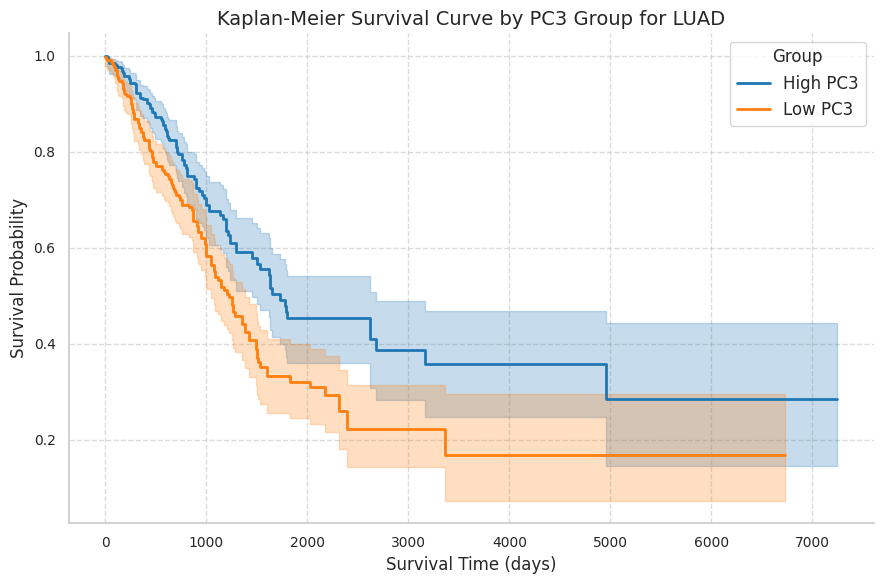

In [54]:
kalpan_meier_survival_curve(LUAD_cox_df, "LUAD")

## Subtype - PRAD

In [55]:
PRAD_top_degs = read_degs("../project/dsmp-2024-groupm22/files/PRAD_results.csv")


In [56]:
PRAD_top_tfs = ['FOXP2', 'TCF12', 'STAT3', 'FOSL2', 'MXI1', 'SIN3A', 'MAX', 'SP1', 'NR3C1', 'TAF1']


In [57]:
selected_features = list(set(PRAD_top_degs) | set(PRAD_top_tfs))
# selected_features = list(set(PRAD_top_tfs))

In [58]:
PRAD_gene_expression_levels = pd.read_csv('Gene-Expression-Levels/TOIL_RSEM_TPM_PRAD.csv', low_memory=False, index_col=1)
PRAD_gene_expression_levels = PRAD_gene_expression_levels.drop(columns="Unnamed: 0")

In [59]:
PRAD_integrated_expressions_df = PRAD_gene_expression_levels.loc[PRAD_gene_expression_levels.index.intersection(selected_features)]


In [60]:
PRAD_integrated_features = PRAD_integrated_expressions_df.T
PRAD_integrated_features.head()


HGNC_symbol,RPUSD1,MRC2,SLC25A39,FHL1,EHD2,AGPAT4,TIMP2,NOP16,HEBP2,MRTO4,...,CARMN,C8orf88,TMEM200B,ZNRD2-DT,SNHG19,PAPOLA-DT,BOP1,MRPL12,NDUFA7,NOL12
TCGA_EJ_7125,3.9421,3.7182,7.8556,6.1615,4.5342,-0.5973,6.5045,4.0322,7.5364,4.3177,...,1.0711,1.9111,2.6161,0.2400,6.9618,-1.8836,5.2107,6.2178,6.9789,4.2639
TCGA_CH_5751,4.8460,3.6312,7.0942,4.8177,3.8621,-0.5756,6.0704,4.5355,7.5511,4.7619,...,-0.7108,-0.1993,0.6145,1.5806,6.9287,-0.5973,6.1422,5.5170,6.3646,3.6474
TCGA_KK_A7B3,4.2457,4.6577,7.7526,5.4663,4.6364,0.0440,6.6102,4.8827,6.9190,4.5952,...,1.1960,0.7233,3.0020,1.7532,8.6636,0.8568,5.1732,6.4391,7.1865,4.5723
TCGA_EJ_8468,3.2511,4.3140,6.9049,6.4544,4.5928,0.5370,7.4454,3.8330,6.8493,3.8808,...,2.0254,2.1766,3.0671,1.8242,7.6326,0.2154,3.8095,5.8327,7.2684,4.6242
TCGA_ZG_A8QW,4.2833,4.2526,8.0291,6.8901,4.6300,0.7916,6.5283,5.0618,6.3959,4.7356,...,0.9935,1.3567,3.3264,1.0573,7.2683,0.3573,5.5438,7.3122,7.3103,3.9459


In [61]:
PRAD_average_methylation = pd.read_csv("../project/dsmp-2024-groupm22/files/PRAD_average_methylation.csv", index_col=0)
PRAD_average_methylation_series = PRAD_average_methylation.iloc[:, 0]
PRAD_average_methylation_series.index = PRAD_average_methylation_series.index.str.replace("-01", "", regex=False).str.replace("-", "_", regex=False)


In [62]:
# PRAD_common_smaples = PRAD_integrated_features.index.intersection(PRAD_average_methylation_series.index)
# len(PRAD_common_smaples)

In [63]:
# PRAD_final_features = pd.merge(PRAD_integrated_features, 
#                           PRAD_average_methylation_series.rename("Promoter_Methylation"), 
#                           left_index=True, right_index=True, how='inner')


In [64]:
PRAD_final_features = PRAD_integrated_features


In [65]:
PRAD_cancer_samples = list(PRAD_final_features.index)

In [66]:
PRAD_cox_df = cox_model(survival_df, PRAD_final_features)

<lifelines.CoxPHFitter: fitted with 563 total observations, 553 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 563
number of events observed = 10
   partial log-likelihood = -44.94
         time fit was run = 2025-04-26 18:55:12 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
PC1       -0.00      1.00      0.01           -0.03            0.02                0.97                1.02
PC2        0.00      1.00      0.03           -0.05            0.05                0.95                1.05
PC3        0.02      1.02      0.03           -0.05            0.08                0.96                1.08
PC4        0.01      1.01      0.05           -0.10            0.11                0.91                1.11
PC5        0.02      1.02      0.06           -0.09            0.13                0.91                1.14
PC6        0.01      1.01      0.06           -0.12            0.14                0.89                1.15
PC7        0.02      1.02      0.07           -0.12            0.15                0.89                1.17
PC8       -0.06      0.94      0.07           -0.21            0.08                0.81                1.09
PC9        0.01      1.01      0.08           -0.14            0.17                0.87                1.18
PC10      -0.05      0.95      0.09           -0.22            0.12                0.81                1.13
PC11      -0.04      0.96      0.09           -0.22            0.14                0.81                1.15
PC12      -0.08      0.92      0.10           -0.27            0.10                0.76                1.11
PC13      -0.01      0.99      0.10           -0.21            0.19                0.81                1.21
PC14      -0.04      0.96      0.11           -0.25            0.17                0.78                1.18
PC15      -0.09      0.92      0.11           -0.31            0.13                0.73                1.14

           cmp to     z    p  -log2(p)
covariate                             
PC1          0.00 -0.41 0.68      0.55
PC2          0.00  0.03 0.98      0.03
PC3          0.00  0.51 0.61      0.72
PC4          0.00  0.13 0.90      0.15
PC5          0.00  0.34 0.73      0.45
PC6          0.00  0.16 0.87      0.19
PC7          0.00  0.26 0.80      0.33
PC8          0.00 -0.86 0.39      1.35
PC9          0.00  0.15 0.88      0.19
PC10         0.00 -0.55 0.58      0.78
PC11         0.00 -0.40 0.69      0.54
PC12         0.00 -0.87 0.38      1.38
PC13         0.00 -0.10 0.92      0.12
PC14         0.00 -0.37 0.71      0.48
PC15         0.00 -0.78 0.43      1.20
---
Concordance = 0.50
Partial AIC = 119.88
log-likelihood ratio test = 3.39 on 15 df
-log2(p) of ll-ratio test = 0.00

Log-rank test p-value: 0.1346


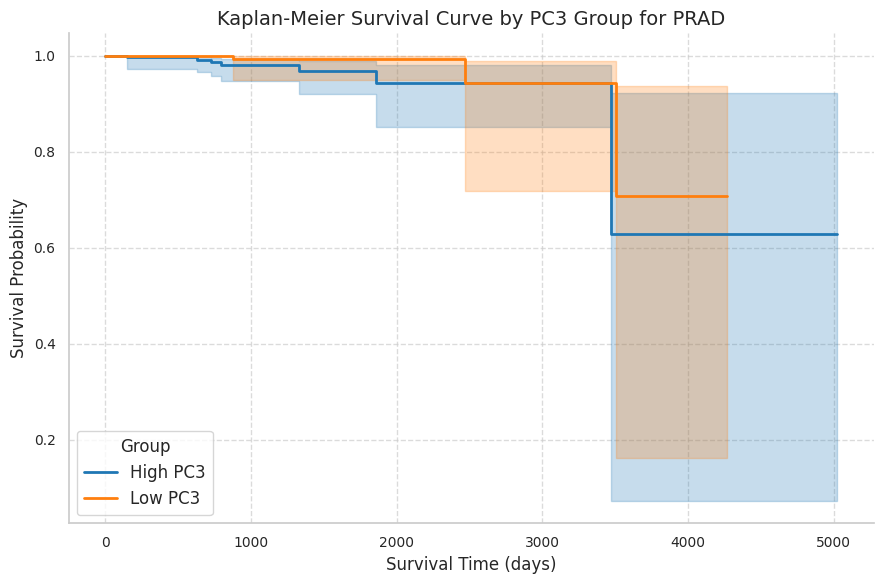

In [67]:
kalpan_meier_survival_curve(PRAD_cox_df, "PRAD")

## Subtype - STAD

In [68]:
STAD_top_degs = read_degs("../project/dsmp-2024-groupm22/files/STAD_results.csv")


In [69]:
STAD_top_tfs = ['HDAC2', 'PBX3', 'YY1', 'FOXP2', 'NR3C1', 'STAT3']


In [70]:
selected_features = list(set(STAD_top_degs) | set(STAD_top_tfs))
# selected_features = list(set(STAD_top_tfs))


In [71]:
STAD_gene_expression_levels = pd.read_csv('Gene-Expression-Levels/TOIL_RSEM_TPM_STAD.csv', low_memory=False, index_col=1)
STAD_gene_expression_levels = STAD_gene_expression_levels.drop(columns="Unnamed: 0")


In [72]:
STAD_integrated_expressions_df = STAD_gene_expression_levels.loc[STAD_gene_expression_levels.index.intersection(selected_features)]


In [73]:
STAD_integrated_features = STAD_integrated_expressions_df.T
STAD_integrated_features.head()

HGNC_symbol,HSPB6,DCN,SLC25A39,FHL1,LTBP1,GUCY1B1,MYLK,PDZD4,ABCC9,IRAG1,...,MAGI2-AS3,NME1,ARHGEF25,INMT,MTFP1,STON1,MARS2,CARMN,MRPL12,RDM1
TCGA_BR_A4J6,7.3650,8.8344,6.6333,4.8709,4.7307,2.3926,5.6387,-0.9686,1.3679,3.5249,...,2.0912,6.2728,2.3366,2.9488,4.2427,2.0289,1.7097,2.5011,5.1014,0.0014
TCGA_IN_7808,4.6006,7.3124,5.7450,4.0100,2.3251,2.0111,3.6254,0.5568,0.0300,0.9419,...,1.5709,5.0295,1.6649,3.6451,2.9319,0.6239,1.2023,0.1776,4.5199,-2.4659
TCGA_BR_A4QL,2.8740,5.1330,7.0759,2.2842,1.6281,0.8246,2.5996,-4.0350,-2.3884,-0.8863,...,-0.4921,7.3459,0.5859,-0.3383,4.1939,-0.7588,2.1734,-1.1488,6.0514,1.2696
TCGA_BR_8372,5.0211,7.3582,7.2974,3.9801,2.8602,2.9338,5.7145,-2.5479,0.5069,2.1766,...,1.4281,7.2907,1.2209,1.0363,5.4941,0.7233,3.7836,0.1776,7.2153,1.3956
TCGA_CG_4466,-0.5543,5.6696,6.3887,2.8462,1.8201,1.7870,3.5572,-5.5735,-0.8599,1.7617,...,0.8327,7.5696,0.6145,-0.4521,3.0671,-0.1345,3.2632,-1.4305,5.6744,1.1447


In [74]:
STAD_average_methylation = pd.read_csv("../project/dsmp-2024-groupm22/files/STAD_average_methylation.csv", index_col=0)
STAD_average_methylation_series = STAD_average_methylation.iloc[:, 0]
STAD_average_methylation_series.index = STAD_average_methylation_series.index.str.replace("-01", "", regex=False).str.replace("-", "_", regex=False)


In [75]:
# STAD_common_smaples = STAD_integrated_features.index.intersection(STAD_average_methylation_series.index)
# len(STAD_common_smaples)


In [76]:
# STAD_final_features = pd.merge(STAD_integrated_features, 
#                           STAD_average_methylation_series.rename("Promoter_Methylation"), 
#                           left_index=True, right_index=True, how='inner')

In [77]:
STAD_final_features = STAD_integrated_features


In [78]:
STAD_cancer_samples = list(STAD_final_features.index)

In [79]:
STAD_cox_df = cox_model(survival_df, STAD_final_features)

<lifelines.CoxPHFitter: fitted with 469 total observations, 292 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 469
number of events observed = 177
   partial log-likelihood = -948.03
         time fit was run = 2025-04-26 18:55:20 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
PC1        0.02      1.02      0.01            0.01            0.03                1.01                1.03
PC2        0.01      1.01      0.01           -0.01            0.04                0.99                1.04
PC3       -0.05      0.95      0.03           -0.10            0.01                0.91                1.01
PC4        0.07      1.07      0.03            0.01            0.13                1.01                1.14
PC5        0.04      1.04      0.04           -0.03            0.12                0.97                1.12
PC6       -0.00      1.00      0.04           -0.08            0.07                0.93                1.07
PC7        0.03      1.03      0.04           -0.06            0.11                0.94                1.12
PC8       -0.06      0.94      0.05           -0.16            0.03                0.85                1.04
PC9        0.01      1.01      0.05           -0.08            0.10                0.92                1.11
PC10       0.05      1.05      0.05           -0.05            0.15                0.95                1.16
PC11       0.05      1.05      0.06           -0.06            0.16                0.94                1.18
PC12      -0.03      0.98      0.06           -0.14            0.09                0.87                1.09
PC13       0.06      1.06      0.06           -0.06            0.17                0.94                1.19
PC14       0.03      1.03      0.06           -0.08            0.15                0.92                1.16
PC15      -0.04      0.96      0.06           -0.17            0.08                0.85                1.09

           cmp to     z      p  -log2(p)
covariate                               
PC1          0.00  2.96 <0.005      8.33
PC2          0.00  0.96   0.34      1.56
PC3          0.00 -1.71   0.09      3.51
PC4          0.00  2.17   0.03      5.05
PC5          0.00  1.14   0.25      1.98
PC6          0.00 -0.05   0.96      0.06
PC7          0.00  0.61   0.54      0.89
PC8          0.00 -1.28   0.20      2.31
PC9          0.00  0.27   0.78      0.35
PC10         0.00  0.91   0.36      1.46
PC11         0.00  0.91   0.37      1.45
PC12         0.00 -0.45   0.66      0.61
PC13         0.00  0.99   0.32      1.64
PC14         0.00  0.53   0.60      0.75
PC15         0.00 -0.64   0.52      0.94
---
Concordance = 0.50
Partial AIC = 1926.07
log-likelihood ratio test = 23.27 on 15 df
-log2(p) of ll-ratio test = 3.67

Log-rank test p-value: 0.2439


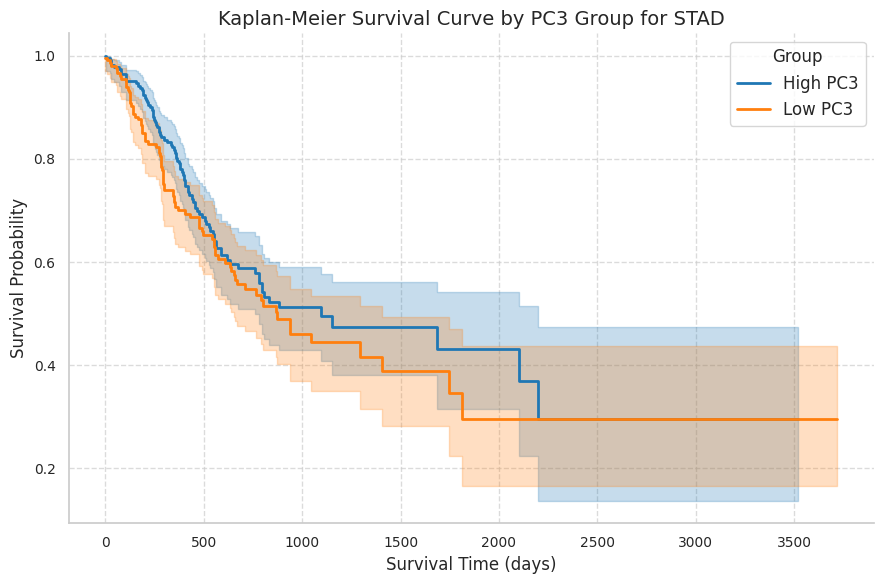

In [80]:
kalpan_meier_survival_curve(STAD_cox_df, "STAD")

# Normal Tissues

In [81]:
GTEX_rsem = pd.read_csv('TOIL_GTEX_RSEM_TPM_5_CANCERS.csv', low_memory=False)
GTEX_rsem[GTEX_rsem["HGNC_symbol"] == "MIR100HG"]

,Unnamed: 0,HGNC_symbol,GTEX_111CU_0326_SM_5GZXO,GTEX_111CU_0526_SM_5EGHK,GTEX_111CU_0926_SM_5EGIK,GTEX_111CU_1126_SM_5EGIM,GTEX_111CU_1526_SM_5N9FS,GTEX_111CU_1926_SM_5GZYZ,GTEX_111FC_0126_SM_5N9DL,GTEX_111FC_1126_SM_5GZWU,...,GTEX_ZYY3_1726_SM_5EGH3,GTEX_ZYY3_2926_SM_5GIEB,GTEX_ZZ64_0426_SM_5E43F,GTEX_ZZ64_1026_SM_5GZXG,GTEX_ZZ64_1726_SM_5GZYB,GTEX_ZZPT_0226_SM_5E43X,GTEX_ZZPT_1326_SM_5E43H,GTEX_ZZPU_0526_SM_5E44U,GTEX_ZZPU_0726_SM_5N9C8,GTEX_ZZPU_1426_SM_5GZZ6
42580,ENSG00000255248,MIR100HG,4.8182,0.9789,-0.0725,2.3649,5.1457,3.9847,2.4117,3.3759,...,-0.2498,0.9935,0.24,3.3787,3.136,4.0558,3.0706,3.9166,2.5263,3.616


In [82]:
GTEX_phenotype = pd.read_csv('TOIL_GTEX_PHENOTYPE_5_CANCERS.csv', low_memory=False)

In [83]:
available_normal_samples = set(GTEX_rsem.columns)
len(available_normal_samples)

1543

## Pancreas

In [84]:
PAAD_normal_top_degs = read_degs("../project/dsmp-2024-groupm22/files/PAAD_normal_results.csv")


In [85]:
PAAD_normal_top_tfs = ['REST', 'TCF12', 'STAT3', 'NRF1', 'PBX3', 'FOSL2']


In [86]:
selected_features = list(set(PAAD_normal_top_degs) | set(PAAD_normal_top_tfs))
# selected_features = list(set(PAAD_normal_top_tfs))

In [87]:
PAAD_normal_samples = GTEX_phenotype[GTEX_phenotype["Primary_site"] == "Pancreas"]
PAAD_normal_samples.head(3)

,Unnamed: 0,Sample,Site_details,Primary_site,Gender,Patient,Cohort
2,18,GTEX_111CU_0526_SM_5EGHK,Pancreas,Pancreas,male,GTEX_111CU,GTEX
18,75,GTEX_111YS_1226_SM_5EGGJ,Pancreas,Pancreas,male,GTEX_111YS,GTEX
23,97,GTEX_1122O_0726_SM_5GIEV,Pancreas,Pancreas,female,GTEX_1122O,GTEX


In [88]:
PAAD_normal_samples_list = set(PAAD_normal_samples["Sample"].tolist())
PAAD_normal_samples_list = PAAD_normal_samples_list.intersection(available_normal_samples)
PAAD_normal_samples_list = list(PAAD_normal_samples_list)
len(PAAD_normal_samples_list)

167

In [89]:
PAAD_normal_gene_expression_levels = ["Unnamed: 0", "HGNC_symbol"] + PAAD_normal_samples_list
PAAD_normal_gene_expression_levels = GTEX_rsem[PAAD_normal_gene_expression_levels]
PAAD_normal_gene_expression_levels = PAAD_normal_gene_expression_levels.set_index("HGNC_symbol")
PAAD_normal_gene_expression_levels = PAAD_normal_gene_expression_levels.drop(columns="Unnamed: 0")
PAAD_normal_gene_expression_levels.head()

,GTEX_13FTW_0526_SM_5IFIP,GTEX_OOBK_1026_SM_48TC2,GTEX_ZDYS_2526_SM_4WKGU,GTEX_ZAB5_0826_SM_5P9FU,GTEX_R53T_0426_SM_48FEM,GTEX_13X6H_0626_SM_5LU53,GTEX_X3Y1_0726_SM_3P5YU,GTEX_13FH7_1426_SM_5IFIC,GTEX_12WSN_0826_SM_5GCOF,GTEX_144GN_0826_SM_5LU5G,...,GTEX_ZYT6_1326_SM_5E453,GTEX_Y5LM_0526_SM_4V6G3,GTEX_14AS3_0326_SM_5Q5DB,GTEX_13NZA_1726_SM_5J1NA,GTEX_145MN_1426_SM_5SI9H,GTEX_ZF2S_0426_SM_4WKGP,GTEX_VUSG_0326_SM_3GIJ7,GTEX_S32W_0826_SM_4AD5Z,GTEX_ZLWG_0326_SM_4WWC7,GTEX_WFON_0626_SM_4LVLX
HGNC_symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2.4675,2.3479,2.4831,3.1939,3.5035,3.0393,2.4198,3.2080,2.6760,3.5174,...,2.4144,3.0234,3.0323,4.5663,3.3450,3.1294,2.9729,3.0550,2.6533,3.5982
TNMD,-9.9658,-3.3076,-4.6082,-9.9658,-3.8160,-5.0116,-4.0350,-9.9658,-9.9658,-9.9658,...,-0.8339,-4.6082,-9.9658,-1.5951,-9.9658,-9.9658,-9.9658,-9.9658,-5.5735,-9.9658
DPM1,3.8289,4.4556,4.2706,3.7550,3.6230,4.6439,3.3061,4.8954,4.0064,4.8161,...,4.0926,4.3674,3.3842,5.0627,4.3068,3.1045,3.6623,4.2488,3.9792,4.3321
SCYL3,1.0151,1.8879,0.9789,1.7141,1.3340,1.8643,0.5859,1.6604,1.6234,1.8879,...,1.4547,1.7229,1.3397,2.7742,1.5216,0.7999,1.3511,2.1411,1.0642,2.3816
FIRRM,-1.0262,0.1648,-0.7834,-0.1345,-0.4921,0.0014,-1.0262,-0.2498,-0.5756,0.0854,...,0.0014,-0.3201,-0.9686,0.7999,-0.5332,-0.5973,1.3454,0.0854,-1.1811,1.0711


In [90]:
PAAD_normal_integrated_expressions_df = PAAD_normal_gene_expression_levels.loc[PAAD_normal_gene_expression_levels.index.intersection(selected_features)]

In [91]:
PAAD_normal_integrated_features = PAAD_normal_integrated_expressions_df.T
PAAD_normal_integrated_features.shape

(167, 206)

In [92]:
PAAD_normal_final_features = PAAD_normal_integrated_features

In [93]:
PAAD_normal_samples = list(PAAD_normal_final_features.index)

In [94]:
PAAD_combined_final_features = pd.concat([PAAD_final_features, PAAD_normal_final_features]).dropna(axis=1)
PAAD_combined_final_features

HGNC_symbol,MOXD1,REST,SRPX,LRCH2,TCF12,STAT3,NOXA1,MIR99AHG,TENM3
TCGA_HZ_7922,5.3632,3.4358,3.7593,1.0573,5.4874,6.7450,0.2154,2.9655,3.6872
TCGA_Q3_A5QY,3.4920,2.0776,4.6662,-0.4719,3.5994,5.2943,1.2209,1.4388,1.0433
TCGA_FB_A545,4.1425,2.8260,3.8044,-0.6643,4.2548,6.1861,3.5498,1.6512,2.1114
TCGA_RL_AAAS,5.6725,1.9564,5.7837,-0.2159,3.9543,5.4611,2.4465,3.6950,2.1247
TCGA_F2_7276,5.1595,3.4543,5.1938,1.0363,5.0960,6.8628,0.9862,2.7249,2.2175
...,...,...,...,...,...,...,...,...,...
GTEX_ZF2S_0426_SM_4WKGP,-1.1172,1.1382,2.5487,-3.6259,1.9564,3.3925,1.6649,-0.7588,-1.4305
GTEX_VUSG_0326_SM_3GIJ7,0.7999,1.5415,2.8219,-1.4699,2.7227,4.7329,2.1766,-3.4580,-0.0425
GTEX_S32W_0826_SM_4AD5Z,-0.1345,1.7870,4.7501,-1.9379,2.8602,5.8543,3.4765,-0.5973,0.0718
GTEX_ZLWG_0326_SM_4WWC7,-0.9971,0.6699,4.2111,-4.2934,1.9377,4.6445,2.4279,-1.9942,-1.5105


PAAD Cancer vs Normal PCA% : [0.71084151 0.10291849]


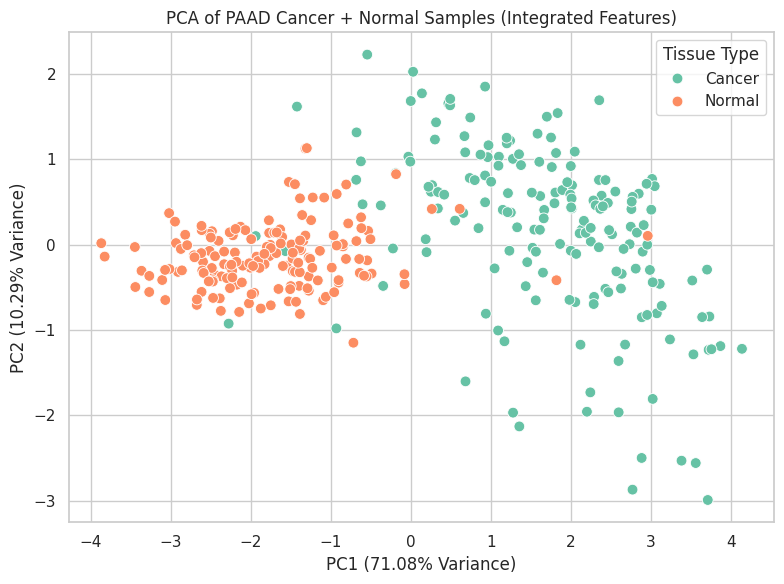

In [95]:
PAAD_pca_df_tuple = pca_comparision(PAAD_combined_final_features, PAAD_cancer_samples, PAAD_normal_samples, "PAAD")

## Skin

In [96]:
SKCM_normal_top_degs = read_degs("../project/dsmp-2024-groupm22/files/SKCM_normal_results.csv")


In [97]:
SKCM_normal_top_tfs = ['TCF12', 'REST', 'STAT3', 'NRF1', 'FOSL2', 'PBX3']


In [98]:
selected_features = list(set(SKCM_normal_top_degs) | set(SKCM_normal_top_tfs))
# selected_features = list(set(SKCM_normal_top_tfs))

In [99]:
SKCM_normal_samples = GTEX_phenotype[GTEX_phenotype["Primary_site"] == "Pancreas"]
SKCM_normal_samples.head(3)

,Unnamed: 0,Sample,Site_details,Primary_site,Gender,Patient,Cohort
2,18,GTEX_111CU_0526_SM_5EGHK,Pancreas,Pancreas,male,GTEX_111CU,GTEX
18,75,GTEX_111YS_1226_SM_5EGGJ,Pancreas,Pancreas,male,GTEX_111YS,GTEX
23,97,GTEX_1122O_0726_SM_5GIEV,Pancreas,Pancreas,female,GTEX_1122O,GTEX


In [100]:
SKCM_normal_samples_list = set(SKCM_normal_samples["Sample"].tolist())
SKCM_normal_samples_list = SKCM_normal_samples_list.intersection(available_normal_samples)
SKCM_normal_samples_list = list(SKCM_normal_samples_list)
len(SKCM_normal_samples_list)

167

In [101]:
SKCM_normal_gene_expression_levels = ["Unnamed: 0", "HGNC_symbol"] + SKCM_normal_samples_list
SKCM_normal_gene_expression_levels = GTEX_rsem[SKCM_normal_gene_expression_levels]
SKCM_normal_gene_expression_levels = SKCM_normal_gene_expression_levels.set_index("HGNC_symbol").drop(columns="Unnamed: 0")
SKCM_normal_gene_expression_levels.head()

,GTEX_13FTW_0526_SM_5IFIP,GTEX_OOBK_1026_SM_48TC2,GTEX_ZDYS_2526_SM_4WKGU,GTEX_ZAB5_0826_SM_5P9FU,GTEX_R53T_0426_SM_48FEM,GTEX_13X6H_0626_SM_5LU53,GTEX_X3Y1_0726_SM_3P5YU,GTEX_13FH7_1426_SM_5IFIC,GTEX_12WSN_0826_SM_5GCOF,GTEX_144GN_0826_SM_5LU5G,...,GTEX_ZYT6_1326_SM_5E453,GTEX_Y5LM_0526_SM_4V6G3,GTEX_14AS3_0326_SM_5Q5DB,GTEX_13NZA_1726_SM_5J1NA,GTEX_145MN_1426_SM_5SI9H,GTEX_ZF2S_0426_SM_4WKGP,GTEX_VUSG_0326_SM_3GIJ7,GTEX_S32W_0826_SM_4AD5Z,GTEX_ZLWG_0326_SM_4WWC7,GTEX_WFON_0626_SM_4LVLX
HGNC_symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2.4675,2.3479,2.4831,3.1939,3.5035,3.0393,2.4198,3.2080,2.6760,3.5174,...,2.4144,3.0234,3.0323,4.5663,3.3450,3.1294,2.9729,3.0550,2.6533,3.5982
TNMD,-9.9658,-3.3076,-4.6082,-9.9658,-3.8160,-5.0116,-4.0350,-9.9658,-9.9658,-9.9658,...,-0.8339,-4.6082,-9.9658,-1.5951,-9.9658,-9.9658,-9.9658,-9.9658,-5.5735,-9.9658
DPM1,3.8289,4.4556,4.2706,3.7550,3.6230,4.6439,3.3061,4.8954,4.0064,4.8161,...,4.0926,4.3674,3.3842,5.0627,4.3068,3.1045,3.6623,4.2488,3.9792,4.3321
SCYL3,1.0151,1.8879,0.9789,1.7141,1.3340,1.8643,0.5859,1.6604,1.6234,1.8879,...,1.4547,1.7229,1.3397,2.7742,1.5216,0.7999,1.3511,2.1411,1.0642,2.3816
FIRRM,-1.0262,0.1648,-0.7834,-0.1345,-0.4921,0.0014,-1.0262,-0.2498,-0.5756,0.0854,...,0.0014,-0.3201,-0.9686,0.7999,-0.5332,-0.5973,1.3454,0.0854,-1.1811,1.0711


In [102]:
SKCM_normal_integrated_expressions_df = SKCM_normal_gene_expression_levels.loc[SKCM_normal_gene_expression_levels.index.intersection(selected_features)]


In [103]:
SKCM_normal_integrated_features = SKCM_normal_integrated_expressions_df.T
SKCM_normal_integrated_features.head()

HGNC_symbol,FUCA2,TFPI,LTBP1,ARHGEF5,ZNF275,TRAM2,PRKCZ,FGFR3,FERMT2,FNDC3B,...,ARHGEF4-AS1,MAGI2-AS3,OR7E62P,NR2F1-AS1,TMEM35B,JMJD7,CEBPA,RASSF8-AS1,GAN,ORAI1
GTEX_13FTW_0526_SM_5IFIP,3.6725,2.2019,-0.2671,2.2144,1.3846,0.9038,3.0688,4.6077,2.1509,2.4171,...,-1.6394,0.1388,-9.9658,-0.4719,3.3689,3.0463,1.5563,0.1124,-1.6850,1.6830
GTEX_OOBK_1026_SM_48TC2,3.9459,3.0671,-0.1665,2.8280,2.2543,1.5806,2.7615,5.4273,2.7051,3.5136,...,-0.7588,1.1577,-2.9324,0.3231,3.8561,3.1491,2.0707,0.4552,-1.2828,2.0912
GTEX_ZDYS_2526_SM_4WKGU,3.3350,2.0500,0.2029,2.3048,1.9340,0.9191,2.7336,5.2913,2.4090,2.5263,...,-1.1488,1.3109,-3.3076,-0.5756,2.7551,2.6693,1.6045,0.6969,-1.6850,1.3283
GTEX_ZAB5_0826_SM_5P9FU,3.5098,2.0844,0.5955,2.2051,1.1897,1.4388,2.6487,5.3078,2.7095,3.3745,...,-0.7834,1.5661,-3.6259,0.6239,3.4804,2.2421,2.0004,0.9115,-0.7108,2.3564
GTEX_R53T_0426_SM_48FEM,3.1717,1.4228,0.8082,2.3816,1.0983,1.3283,2.3451,4.4250,2.3508,3.8591,...,-0.1665,1.5165,-9.9658,0.1124,3.2313,0.8246,1.9188,0.5859,-1.4305,2.1638


In [104]:
SKCM_normal_final_features = SKCM_normal_integrated_features


In [105]:
SKCM_normal_samples = list(SKCM_normal_final_features.index)

In [106]:
SKCM_combined_final_features = pd.concat([SKCM_final_features, SKCM_normal_final_features]).dropna(axis=1)
SKCM_combined_final_features

HGNC_symbol,REST,LAMA4,IL6ST,TCF12,ZEB1,STAT3,ITGA1
TCGA_EB_A41A,2.1894,3.1278,4.4977,4.8560,0.6145,4.9566,0.5370
TCGA_XV_AAZW,1.7185,5.4989,3.9617,4.8973,1.8879,4.9928,2.6670
TCGA_BF_A5ER,-0.2845,3.2481,1.1316,1.5902,-0.6416,5.2056,-1.2828
TCGA_EB_A6QZ,1.4652,6.4527,4.2987,4.8243,-0.6193,5.9360,1.9822
TCGA_EB_A1NK,0.9038,4.5820,2.4492,3.5312,-0.0425,5.9021,0.0990
...,...,...,...,...,...,...,...
GTEX_ZF2S_0426_SM_4WKGP,1.1382,0.2154,2.4252,1.9564,0.0854,3.3925,0.2400
GTEX_VUSG_0326_SM_3GIJ7,1.5415,0.9343,3.4318,2.7227,1.2147,4.7329,1.9601
GTEX_S32W_0826_SM_4AD5Z,1.7870,1.4011,3.3148,2.8602,1.4335,5.8543,1.3454
GTEX_ZLWG_0326_SM_4WWC7,0.6699,0.7916,2.8462,1.9377,0.8647,4.6445,0.1388


SKCM Cancer vs Normal PCA% : [0.6357654  0.17445728]


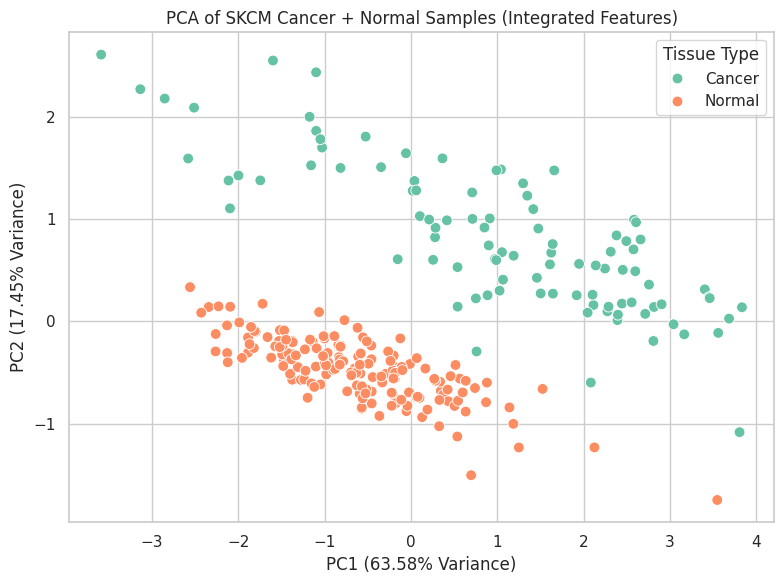

In [107]:
SKCM_pca_df_tuple = pca_comparision(SKCM_combined_final_features, SKCM_cancer_samples, SKCM_normal_samples, "SKCM")

## Blood

In [108]:
LUAD_normal_top_degs = read_degs("../project/dsmp-2024-groupm22/files/LUAD_normal_results.csv")


In [109]:
LUAD_normal_top_tfs = ['TCF12', 'REST' 'STAT3', 'NRF1', 'PBX3', 'FOSL2']


In [110]:
selected_features = list(set(LUAD_normal_top_degs) | set(LUAD_normal_top_tfs))
# selected_features = list(set(LUAD_normal_top_tfs))


In [111]:
LUAD_normal_samples = GTEX_phenotype[GTEX_phenotype["Primary_site"] == "Pancreas"]
LUAD_normal_samples.head(3)

,Unnamed: 0,Sample,Site_details,Primary_site,Gender,Patient,Cohort
2,18,GTEX_111CU_0526_SM_5EGHK,Pancreas,Pancreas,male,GTEX_111CU,GTEX
18,75,GTEX_111YS_1226_SM_5EGGJ,Pancreas,Pancreas,male,GTEX_111YS,GTEX
23,97,GTEX_1122O_0726_SM_5GIEV,Pancreas,Pancreas,female,GTEX_1122O,GTEX


In [112]:
LUAD_normal_samples_list = set(LUAD_normal_samples["Sample"].tolist())
LUAD_normal_samples_list = LUAD_normal_samples_list.intersection(available_normal_samples)
LUAD_normal_samples_list = list(LUAD_normal_samples_list)
len(LUAD_normal_samples_list)


167

In [113]:
LUAD_normal_gene_expression_levels = ["Unnamed: 0", "HGNC_symbol"] + LUAD_normal_samples_list
LUAD_normal_gene_expression_levels = GTEX_rsem[LUAD_normal_gene_expression_levels]
LUAD_normal_gene_expression_levels = LUAD_normal_gene_expression_levels.set_index("HGNC_symbol").drop(columns=["Unnamed: 0"])
LUAD_normal_gene_expression_levels.head()

,GTEX_13FTW_0526_SM_5IFIP,GTEX_OOBK_1026_SM_48TC2,GTEX_ZDYS_2526_SM_4WKGU,GTEX_ZAB5_0826_SM_5P9FU,GTEX_R53T_0426_SM_48FEM,GTEX_13X6H_0626_SM_5LU53,GTEX_X3Y1_0726_SM_3P5YU,GTEX_13FH7_1426_SM_5IFIC,GTEX_12WSN_0826_SM_5GCOF,GTEX_144GN_0826_SM_5LU5G,...,GTEX_ZYT6_1326_SM_5E453,GTEX_Y5LM_0526_SM_4V6G3,GTEX_14AS3_0326_SM_5Q5DB,GTEX_13NZA_1726_SM_5J1NA,GTEX_145MN_1426_SM_5SI9H,GTEX_ZF2S_0426_SM_4WKGP,GTEX_VUSG_0326_SM_3GIJ7,GTEX_S32W_0826_SM_4AD5Z,GTEX_ZLWG_0326_SM_4WWC7,GTEX_WFON_0626_SM_4LVLX
HGNC_symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2.4675,2.3479,2.4831,3.1939,3.5035,3.0393,2.4198,3.2080,2.6760,3.5174,...,2.4144,3.0234,3.0323,4.5663,3.3450,3.1294,2.9729,3.0550,2.6533,3.5982
TNMD,-9.9658,-3.3076,-4.6082,-9.9658,-3.8160,-5.0116,-4.0350,-9.9658,-9.9658,-9.9658,...,-0.8339,-4.6082,-9.9658,-1.5951,-9.9658,-9.9658,-9.9658,-9.9658,-5.5735,-9.9658
DPM1,3.8289,4.4556,4.2706,3.7550,3.6230,4.6439,3.3061,4.8954,4.0064,4.8161,...,4.0926,4.3674,3.3842,5.0627,4.3068,3.1045,3.6623,4.2488,3.9792,4.3321
SCYL3,1.0151,1.8879,0.9789,1.7141,1.3340,1.8643,0.5859,1.6604,1.6234,1.8879,...,1.4547,1.7229,1.3397,2.7742,1.5216,0.7999,1.3511,2.1411,1.0642,2.3816
FIRRM,-1.0262,0.1648,-0.7834,-0.1345,-0.4921,0.0014,-1.0262,-0.2498,-0.5756,0.0854,...,0.0014,-0.3201,-0.9686,0.7999,-0.5332,-0.5973,1.3454,0.0854,-1.1811,1.0711


In [114]:
LUAD_normal_integrated_expressions_df = LUAD_normal_gene_expression_levels.loc[LUAD_normal_gene_expression_levels.index.intersection(selected_features)]


In [115]:
LUAD_normal_integrated_features = LUAD_normal_integrated_expressions_df.T
LUAD_normal_integrated_features.head()

HGNC_symbol,ZBTB32,ACP3,HGF,SAMD4A,SLC4A7,ROS1,KCNQ1,RASGRF1,PTGS2,SEMA3A,...,LINC02894,GAN,PAQR5-DT,SNORD3A,ARHGAP44-AS1,LINC01140,TAF5LP1,CASC15,PACERR,SYT15B
GTEX_13FTW_0526_SM_5IFIP,-2.9324,-0.3201,-1.7322,0.6425,-0.6873,-9.9658,4.4169,-1.8836,-5.0116,-5.0116,...,-0.5973,-1.6850,-2.9324,2.2842,-9.9658,-0.1187,-2.0529,-2.8262,-9.9658,0.3115
GTEX_OOBK_1026_SM_48TC2,-0.7346,-0.0725,-1.5105,0.7748,0.4340,-6.5064,3.8340,-3.0469,-4.6082,-3.6259,...,-0.8863,-1.2828,-2.4659,5.0666,-9.9658,1.5165,-1.8314,-2.3147,-3.1714,0.5763
GTEX_ZDYS_2526_SM_4WKGU,-3.3076,-0.6193,-2.2447,-0.1993,-0.0725,-6.5064,3.9251,0.0014,-3.4580,-5.5735,...,-0.0725,-1.6850,-2.6349,3.7603,-6.5064,-0.3383,-3.3076,-2.3147,-4.6082,-0.2671
GTEX_ZAB5_0826_SM_5P9FU,-2.1779,-0.2671,0.0580,1.3167,0.3907,-9.9658,4.2855,-0.6193,-0.5332,-3.4580,...,-0.6193,-0.7108,-2.5479,6.3212,-9.9658,0.3460,-2.2447,-0.2845,-3.1714,0.3460
GTEX_R53T_0426_SM_48FEM,-2.0529,-1.0262,-0.9971,0.1388,-0.4921,-9.9658,4.2457,-1.0262,-2.8262,-4.2934,...,-0.8339,-1.4305,-2.4659,3.3032,-9.9658,-0.0725,-3.8160,-1.1811,-4.6082,1.2209


In [116]:
LUAD_normal_final_features = LUAD_normal_integrated_features


In [117]:
LUAD_normal_samples = list(LUAD_normal_final_features.index)

In [118]:
LUAD_combined_final_features = pd.concat([LUAD_final_features, LUAD_normal_final_features]).dropna(axis=1)
LUAD_combined_final_features

HGNC_symbol,FOSL2,TTC39A,PRRX1,ARTN,TGFB3,TCF12,FGF7,LRRN4CL,DACT3,MSC-AS1,LINC02894
TCGA_44_6778,5.2854,3.4971,3.0876,0.1903,3.1620,4.3385,3.2080,-1.9379,1.2756,2.7183,0.8246
TCGA_05_4420,3.6428,5.5829,3.1228,2.4701,3.5274,4.0593,2.0289,-0.6416,0.5069,0.2642,0.2998
TCGA_64_1679,6.5390,4.4310,5.7650,0.3685,4.4958,5.0414,3.6136,0.8082,2.9052,2.0183,-1.2481
TCGA_49_6744,5.0644,4.0419,4.7077,-1.5951,4.3155,4.3449,3.0270,-0.6873,2.2019,1.1897,-0.8863
TCGA_55_6982,5.0532,5.9784,4.8724,-1.1811,4.6826,4.2181,3.8147,-0.1993,2.6090,1.7744,0.3346
...,...,...,...,...,...,...,...,...,...,...,...
GTEX_ZF2S_0426_SM_4WKGP,1.4065,1.4228,-0.1665,-0.9132,2.4544,1.9564,1.1447,-1.3548,-1.3548,0.0300,-1.1172
GTEX_VUSG_0326_SM_3GIJ7,3.0515,2.5972,1.5013,1.1250,4.0532,2.7227,2.8117,-0.9686,0.1124,1.0779,-0.2328
GTEX_S32W_0826_SM_4AD5Z,3.6195,3.3119,0.6332,-0.2328,4.1466,2.8602,0.4967,-0.3940,-0.8084,1.0151,-1.3548
GTEX_ZLWG_0326_SM_4WWC7,3.2359,2.0810,-0.8084,0.1124,4.1145,1.9377,2.2113,-0.7834,-1.8314,-0.3566,-1.3183


LUAD Cancer vs Normal PCA% : [0.42808979 0.19698976]


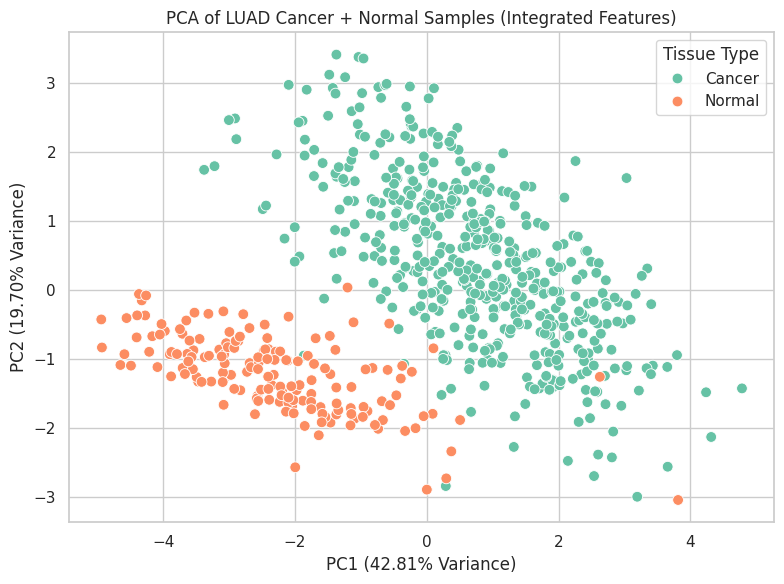

In [119]:
LUAD_pca_df_tuple = pca_comparision(LUAD_combined_final_features, LUAD_cancer_samples, LUAD_normal_samples, "LUAD")

## Prostate

In [120]:
PRAD_normal_top_degs = read_degs("../project/dsmp-2024-groupm22/files/PRAD_normal_results.csv")


In [121]:
PRAD_normal_top_tfs = ['TCF12', 'REST', 'STAT3', 'NRF1', 'PBX3', 'FOSL2']


In [122]:
selected_features = list(set(PRAD_normal_top_degs) | set(PRAD_normal_top_tfs))
# selected_features = list(set(PRAD_normal_top_tfs))

In [123]:
PRAD_normal_samples = GTEX_phenotype[GTEX_phenotype["Primary_site"] == "Pancreas"]
PRAD_normal_samples.head(3)

,Unnamed: 0,Sample,Site_details,Primary_site,Gender,Patient,Cohort
2,18,GTEX_111CU_0526_SM_5EGHK,Pancreas,Pancreas,male,GTEX_111CU,GTEX
18,75,GTEX_111YS_1226_SM_5EGGJ,Pancreas,Pancreas,male,GTEX_111YS,GTEX
23,97,GTEX_1122O_0726_SM_5GIEV,Pancreas,Pancreas,female,GTEX_1122O,GTEX


In [124]:
PRAD_normal_samples_list = set(PRAD_normal_samples["Sample"].tolist())
PRAD_normal_samples_list = PRAD_normal_samples_list.intersection(available_normal_samples)
PRAD_normal_samples_list = list(PRAD_normal_samples_list)
len(PRAD_normal_samples_list)

167

In [125]:
PRAD_normal_gene_expression_levels = ["Unnamed: 0", "HGNC_symbol"] + PRAD_normal_samples_list
PRAD_normal_gene_expression_levels = GTEX_rsem[PRAD_normal_gene_expression_levels]
PRAD_normal_gene_expression_levels = PRAD_normal_gene_expression_levels.set_index("HGNC_symbol").drop(columns=["Unnamed: 0"])
PRAD_normal_gene_expression_levels.head()

,GTEX_13FTW_0526_SM_5IFIP,GTEX_OOBK_1026_SM_48TC2,GTEX_ZDYS_2526_SM_4WKGU,GTEX_ZAB5_0826_SM_5P9FU,GTEX_R53T_0426_SM_48FEM,GTEX_13X6H_0626_SM_5LU53,GTEX_X3Y1_0726_SM_3P5YU,GTEX_13FH7_1426_SM_5IFIC,GTEX_12WSN_0826_SM_5GCOF,GTEX_144GN_0826_SM_5LU5G,...,GTEX_ZYT6_1326_SM_5E453,GTEX_Y5LM_0526_SM_4V6G3,GTEX_14AS3_0326_SM_5Q5DB,GTEX_13NZA_1726_SM_5J1NA,GTEX_145MN_1426_SM_5SI9H,GTEX_ZF2S_0426_SM_4WKGP,GTEX_VUSG_0326_SM_3GIJ7,GTEX_S32W_0826_SM_4AD5Z,GTEX_ZLWG_0326_SM_4WWC7,GTEX_WFON_0626_SM_4LVLX
HGNC_symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2.4675,2.3479,2.4831,3.1939,3.5035,3.0393,2.4198,3.2080,2.6760,3.5174,...,2.4144,3.0234,3.0323,4.5663,3.3450,3.1294,2.9729,3.0550,2.6533,3.5982
TNMD,-9.9658,-3.3076,-4.6082,-9.9658,-3.8160,-5.0116,-4.0350,-9.9658,-9.9658,-9.9658,...,-0.8339,-4.6082,-9.9658,-1.5951,-9.9658,-9.9658,-9.9658,-9.9658,-5.5735,-9.9658
DPM1,3.8289,4.4556,4.2706,3.7550,3.6230,4.6439,3.3061,4.8954,4.0064,4.8161,...,4.0926,4.3674,3.3842,5.0627,4.3068,3.1045,3.6623,4.2488,3.9792,4.3321
SCYL3,1.0151,1.8879,0.9789,1.7141,1.3340,1.8643,0.5859,1.6604,1.6234,1.8879,...,1.4547,1.7229,1.3397,2.7742,1.5216,0.7999,1.3511,2.1411,1.0642,2.3816
FIRRM,-1.0262,0.1648,-0.7834,-0.1345,-0.4921,0.0014,-1.0262,-0.2498,-0.5756,0.0854,...,0.0014,-0.3201,-0.9686,0.7999,-0.5332,-0.5973,1.3454,0.0854,-1.1811,1.0711


In [126]:
PRAD_normal_integrated_expressions_df = PRAD_normal_gene_expression_levels.loc[PRAD_normal_gene_expression_levels.index.intersection(selected_features)]


In [127]:
PRAD_normal_integrated_features = PRAD_normal_integrated_expressions_df.T
PRAD_normal_integrated_features.head()


HGNC_symbol,TFPI,CYB561,DCN,ATP2C1,VIM,AGPAT4,GAB2,TIMP2,NEDD4L,STYK1,...,H2AJ,SORD2P,UBE2Q2P13,TMEM178B,GOLGA4-AS1,UNC5C-AS1,CASC15,MAP7-AS1,LINC02967,PCCA-DT
GTEX_13FTW_0526_SM_5IFIP,2.2019,5.3899,5.3527,3.3506,5.9837,-1.2142,0.8246,4.5832,4.3972,-4.0350,...,6.3343,-0.7834,-2.8262,-1.6850,-1.4699,-5.0116,-2.8262,-0.5543,3.8177,-0.0425
GTEX_OOBK_1026_SM_48TC2,3.0671,5.2788,5.5364,3.6440,7.2704,-0.0877,2.2144,4.6347,5.1498,-5.0116,...,6.4804,2.2990,-0.3022,-1.8836,-1.5951,-9.9658,-2.3147,-0.9971,4.5553,0.0580
GTEX_ZDYS_2526_SM_4WKGU,2.0500,5.0867,5.1453,3.1409,6.4236,-0.0877,1.0007,4.6393,5.0162,-9.9658,...,6.3379,-0.9406,-1.0262,-1.3921,-0.4131,-4.0350,-2.3147,-1.2142,4.0480,-0.2671
GTEX_ZAB5_0826_SM_5P9FU,2.0844,6.1803,5.9141,3.7248,7.2429,0.4125,1.0983,5.0090,3.9801,-5.5735,...,5.5967,-0.2159,-1.2828,-1.3921,-1.9379,-6.5064,-0.2845,-0.8599,3.6714,0.3907
GTEX_R53T_0426_SM_48FEM,1.4228,5.9011,6.3691,3.9496,6.8290,0.2762,0.8488,4.6594,3.9223,-5.5735,...,5.4138,-0.3752,-1.7809,-1.9942,-1.5951,-5.5735,-1.1811,-0.7346,3.8501,0.2400


In [128]:
PRAD_normal_final_features = PRAD_normal_integrated_features


In [129]:
PRAD_normal_samples = list(PRAD_normal_final_features.index)

In [130]:
PRAD_combined_final_features = pd.concat([PRAD_final_features, PRAD_normal_final_features]).dropna(axis=1)
PRAD_combined_final_features

HGNC_symbol,AGPAT4,TIMP2,FOSL2,DPYSL2,PYCR3,SYNGR2,LAMA4,CNRIP1,GLT8D2,GFPT2,...,GSN,SERPING1,JAM2,EGFLAM,STAT3,SLC16A4,SPTBN2,C1S,DNM3OS,MAGI2-AS3
TCGA_EJ_7125,-0.5973,6.5045,4.9741,3.6101,4.0471,9.5087,3.4237,2.5658,2.7357,1.4859,...,7.2691,7.0540,2.5213,2.8178,6.4803,0.0718,6.1991,6.1809,-1.8836,2.2051
TCGA_CH_5751,-0.5756,6.0704,5.0998,3.6301,4.4764,8.0854,3.4210,2.4252,1.9859,0.2762,...,6.7884,6.9304,2.9784,2.4805,6.0186,0.4657,5.7134,6.5802,-1.4305,2.0535
TCGA_KK_A7B3,0.0440,6.6102,3.5535,3.5187,4.1128,9.1728,3.1781,2.7763,2.6278,1.6920,...,7.9594,7.3879,2.6873,2.7095,5.6233,0.7233,6.1133,6.7795,-1.2142,2.3479
TCGA_EJ_8468,0.5370,7.4454,5.3789,3.3003,3.1733,8.9852,3.8023,3.4661,3.4894,2.4857,...,8.0468,7.6599,3.5498,3.0723,6.5429,1.9340,5.5690,7.5176,-0.5543,3.4765
TCGA_ZG_A8QW,0.7916,6.5283,4.3140,3.4583,4.1644,8.9211,3.3842,2.5338,2.4412,1.8524,...,7.9733,7.7017,2.4306,1.9490,6.0451,0.9493,5.6668,7.1923,-0.6643,2.4171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX_ZF2S_0426_SM_4WKGP,-1.3548,4.3758,1.4065,1.4011,0.5955,5.4283,0.2154,0.0854,-0.1665,-0.3940,...,4.3848,5.6996,0.0854,0.2400,3.3925,-1.3183,2.4144,4.1441,-1.9942,0.2881
GTEX_VUSG_0326_SM_3GIJ7,0.1903,4.8768,3.0515,2.1013,0.3231,5.8814,0.9343,2.4571,0.4865,0.2522,...,5.1930,5.9980,2.1013,0.5568,4.7329,-0.3383,3.0163,5.0858,-1.4699,3.0056
GTEX_S32W_0826_SM_4AD5Z,-0.3752,5.1111,3.6195,2.6019,2.7117,6.6991,1.4011,1.3956,1.0983,1.5216,...,6.3203,7.8059,1.6187,-0.4521,5.8543,-0.3022,2.9581,6.4895,-1.4699,2.1830
GTEX_ZLWG_0326_SM_4WWC7,-0.9132,4.8141,3.2359,1.6420,1.8957,5.9437,0.7916,0.5955,0.6145,2.0979,...,5.6688,6.7848,-0.6416,0.2400,4.6445,-1.7809,3.4102,5.4152,-1.5105,0.6880


PRAD Cancer vs Normal PCA% : [0.63680056 0.1816722 ]


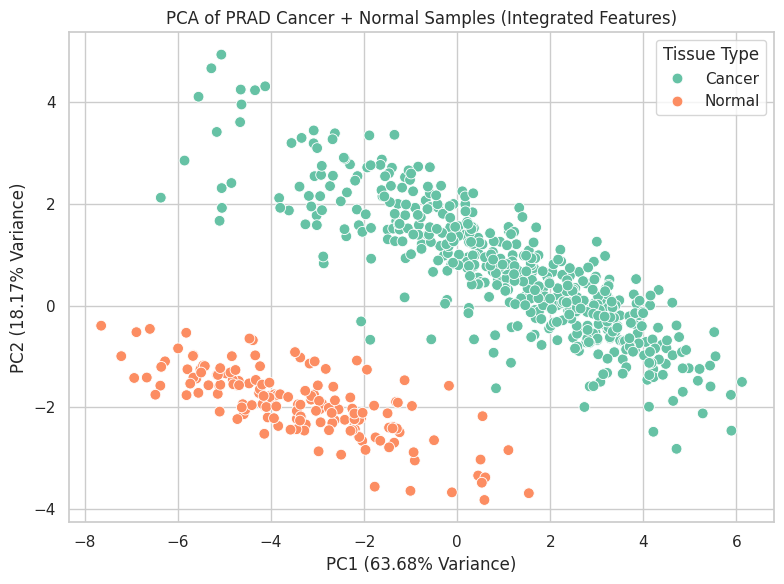

In [131]:
PRAD_pca_df_tuple = pca_comparision(PRAD_combined_final_features, PRAD_cancer_samples, PRAD_normal_samples, "PRAD")

## Stomach

In [132]:
STAD_normal_top_degs = read_degs("../project/dsmp-2024-groupm22/files/STAD_normal_results.csv")


In [133]:
STAD_normal_top_tfs = ['TCF12', 'REST', 'STAT3', 'PBX3', 'FOSL2', 'NRF1']


In [134]:
selected_features = list(set(STAD_normal_top_degs) | set(STAD_normal_top_tfs))
# selected_features = list(set(STAD_normal_top_tfs))

In [135]:
STAD_normal_samples = GTEX_phenotype[GTEX_phenotype["Primary_site"] == "Pancreas"]
STAD_normal_samples.head(3)

,Unnamed: 0,Sample,Site_details,Primary_site,Gender,Patient,Cohort
2,18,GTEX_111CU_0526_SM_5EGHK,Pancreas,Pancreas,male,GTEX_111CU,GTEX
18,75,GTEX_111YS_1226_SM_5EGGJ,Pancreas,Pancreas,male,GTEX_111YS,GTEX
23,97,GTEX_1122O_0726_SM_5GIEV,Pancreas,Pancreas,female,GTEX_1122O,GTEX


In [136]:
STAD_normal_samples_list = set(STAD_normal_samples["Sample"].tolist())
STAD_normal_samples_list = STAD_normal_samples_list.intersection(available_normal_samples)
STAD_normal_samples_list = list(STAD_normal_samples_list)
len(STAD_normal_samples_list)


167

In [137]:
STAD_normal_gene_expression_levels = ["Unnamed: 0", "HGNC_symbol"] + STAD_normal_samples_list
STAD_normal_gene_expression_levels = GTEX_rsem[STAD_normal_gene_expression_levels]
STAD_normal_gene_expression_levels = STAD_normal_gene_expression_levels.set_index("HGNC_symbol").drop(columns=["Unnamed: 0"])
STAD_normal_gene_expression_levels.head()

,GTEX_13FTW_0526_SM_5IFIP,GTEX_OOBK_1026_SM_48TC2,GTEX_ZDYS_2526_SM_4WKGU,GTEX_ZAB5_0826_SM_5P9FU,GTEX_R53T_0426_SM_48FEM,GTEX_13X6H_0626_SM_5LU53,GTEX_X3Y1_0726_SM_3P5YU,GTEX_13FH7_1426_SM_5IFIC,GTEX_12WSN_0826_SM_5GCOF,GTEX_144GN_0826_SM_5LU5G,...,GTEX_ZYT6_1326_SM_5E453,GTEX_Y5LM_0526_SM_4V6G3,GTEX_14AS3_0326_SM_5Q5DB,GTEX_13NZA_1726_SM_5J1NA,GTEX_145MN_1426_SM_5SI9H,GTEX_ZF2S_0426_SM_4WKGP,GTEX_VUSG_0326_SM_3GIJ7,GTEX_S32W_0826_SM_4AD5Z,GTEX_ZLWG_0326_SM_4WWC7,GTEX_WFON_0626_SM_4LVLX
HGNC_symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2.4675,2.3479,2.4831,3.1939,3.5035,3.0393,2.4198,3.2080,2.6760,3.5174,...,2.4144,3.0234,3.0323,4.5663,3.3450,3.1294,2.9729,3.0550,2.6533,3.5982
TNMD,-9.9658,-3.3076,-4.6082,-9.9658,-3.8160,-5.0116,-4.0350,-9.9658,-9.9658,-9.9658,...,-0.8339,-4.6082,-9.9658,-1.5951,-9.9658,-9.9658,-9.9658,-9.9658,-5.5735,-9.9658
DPM1,3.8289,4.4556,4.2706,3.7550,3.6230,4.6439,3.3061,4.8954,4.0064,4.8161,...,4.0926,4.3674,3.3842,5.0627,4.3068,3.1045,3.6623,4.2488,3.9792,4.3321
SCYL3,1.0151,1.8879,0.9789,1.7141,1.3340,1.8643,0.5859,1.6604,1.6234,1.8879,...,1.4547,1.7229,1.3397,2.7742,1.5216,0.7999,1.3511,2.1411,1.0642,2.3816
FIRRM,-1.0262,0.1648,-0.7834,-0.1345,-0.4921,0.0014,-1.0262,-0.2498,-0.5756,0.0854,...,0.0014,-0.3201,-0.9686,0.7999,-0.5332,-0.5973,1.3454,0.0854,-1.1811,1.0711


In [138]:
STAD_normal_integrated_expressions_df = STAD_normal_gene_expression_levels.loc[STAD_normal_gene_expression_levels.index.intersection(selected_features)]


In [139]:
STAD_normal_integrated_features = STAD_normal_integrated_expressions_df.T
STAD_normal_integrated_features.head()

HGNC_symbol,MYH13,CNTN1,NRXN3,METTL24,KCNQ1,MPPED2,SYT1,ABCC9,PLA2G10,FGF10,...,TTC39A-AS1,DSG2-AS1,PCAT18,HMGB3P27,ATP5MGP7,ERVE-1,KRT89P,HNF1B,KMT2CP2,LSINCT5
GTEX_13FTW_0526_SM_5IFIP,-9.9658,-0.7834,-0.7588,-1.5522,4.4169,-0.7108,-1.4305,-0.1504,1.0983,0.0854,...,-1.1811,-9.9658,-5.5735,-0.5543,-2.3884,2.9205,-4.0350,2.8701,-9.9658,-9.9658
GTEX_OOBK_1026_SM_48TC2,-9.9658,-3.1714,-1.1488,-1.6850,3.8340,-0.7346,-4.0350,-0.4719,-1.8836,0.4340,...,-0.9971,-4.6082,-4.6082,2.9032,-1.7322,3.6474,-9.9658,4.0064,-9.9658,-9.9658
GTEX_ZDYS_2526_SM_4WKGU,-6.5064,-0.3383,-1.8314,-1.4699,3.9251,-0.3201,-2.8262,-0.3566,0.9862,0.2400,...,-1.4699,-5.0116,-2.9324,-0.4521,-9.9658,3.3745,-3.6259,3.2707,-9.9658,-9.9658
GTEX_ZAB5_0826_SM_5P9FU,-9.9658,-0.5332,0.0440,-0.5125,4.2855,0.4865,-4.0350,0.7664,1.5465,1.3846,...,-1.4699,-3.4580,-4.0350,-3.0469,-9.9658,3.6905,-2.3147,3.5436,-9.9658,-5.0116
GTEX_R53T_0426_SM_48FEM,-9.9658,-0.0877,0.2762,-0.8084,4.2457,0.0718,-3.6259,0.6425,1.3567,1.4174,...,-1.8836,-9.9658,-9.9658,-9.9658,-9.9658,2.4985,-9.9658,3.5730,-9.9658,-9.9658


In [140]:
STAD_normal_final_features = STAD_normal_integrated_features

In [141]:
STAD_normal_samples = list(STAD_normal_final_features.index)

In [142]:
STAD_combined_final_features = pd.concat([STAD_final_features, STAD_normal_final_features]).dropna(axis=1)
STAD_combined_final_features

HGNC_symbol,ABCC9,SFRP1,THBS4,CASQ2,CPXM2,CNN1,COL8A1,SCRG1,GUCY1A1,PBX3,STAT3,RNF150,BNC2,SSC5D,LAYN,CARMN
TCGA_BR_A4J6,1.3679,1.5563,2.9319,1.6140,2.9562,5.9047,4.2017,0.2400,2.7679,2.1574,5.4172,0.0440,-1.0559,2.6624,1.8879,2.5011
TCGA_IN_7808,0.0300,2.0076,2.4063,-1.9379,1.1833,1.0151,-2.0529,-1.6850,2.1114,3.3003,5.6215,1.3956,0.5568,0.7058,1.2085,0.1776
TCGA_BR_A4QL,-2.3884,-3.6259,2.2144,-3.8160,-0.2159,3.5791,1.8323,-3.1714,0.8488,0.2642,3.6230,-2.9324,-2.0529,0.0158,-0.0425,-1.1488
TCGA_BR_8372,0.5069,-0.6643,2.1670,-1.4699,1.5165,5.9108,2.3592,-1.6850,3.1701,2.3871,5.8888,-1.3183,-0.5756,-0.7834,2.2842,0.1776
TCGA_CG_4466,-0.8599,-3.8160,-1.3548,-4.6082,-0.6193,1.8484,1.4756,-2.7274,1.0222,3.6382,5.7679,-2.2447,-2.1779,-1.9942,0.4761,-1.4305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX_ZF2S_0426_SM_4WKGP,-0.9406,0.8488,2.4934,-5.5735,-0.4719,-0.1187,-1.6394,-4.2934,0.7579,2.0604,3.3925,-1.7809,-2.1140,-0.9406,-0.6873,-3.6259
GTEX_VUSG_0326_SM_3GIJ7,1.4494,1.0983,3.5645,-1.1488,0.7832,2.0604,-0.9406,-4.2934,1.9377,3.1162,4.7329,-1.1172,-2.5479,-2.0529,0.7493,-0.6643
GTEX_S32W_0826_SM_4AD5Z,1.4228,-0.1031,3.4713,-1.7809,0.6608,1.2815,-1.2481,-1.8314,1.7744,3.4984,5.8543,-0.3383,-1.8314,-0.3940,0.8726,-1.4699
GTEX_ZLWG_0326_SM_4WWC7,0.3907,0.6880,3.1701,-2.7274,-0.5125,0.2998,-1.1172,-3.3076,0.6969,2.1957,4.6445,-1.1488,-2.9324,-0.8599,-0.9406,-1.5951


STAD Cancer vs Normal PCA% : [0.73109507 0.09824182]


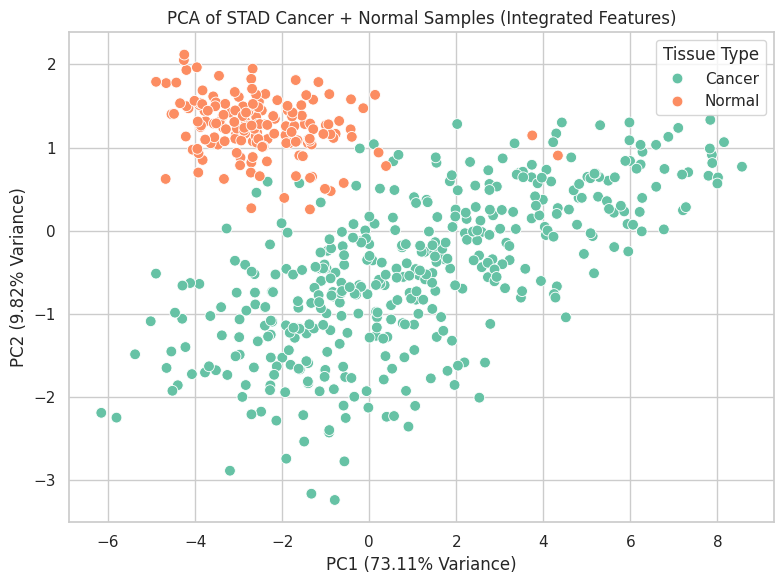

In [143]:
STAD_pca_df_tuple = pca_comparision(STAD_combined_final_features, STAD_cancer_samples, STAD_normal_samples, "STAD")

In [144]:
pca_results_dict = {"PAAD": PAAD_pca_df_tuple, "SKCM": SKCM_pca_df_tuple, "LUAD": LUAD_pca_df_tuple, "PRAD": PRAD_pca_df_tuple, "STAD": STAD_pca_df_tuple}

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pca_grid(pca_results_dict):
    """
    pca_results_dict: dict with keys as cancer types and values as (pca_df, explained_variance_ratio)
    Each pca_df must contain 'PC1', 'PC2', and 'Tissue Type' columns
    """
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # IEEE half-page width setup
    axes = axes.flatten()

    for i, (cancer, (df, var)) in enumerate(pca_results_dict.items()):
        ax = axes[i]
        sns.scatterplot(data=df, x="PC1", y="PC2", hue="Group", palette="Set2",
                        s=30, edgecolor='w', linewidth=0.3, ax=ax, legend=False)
        ax.set_title(f"{cancer}", fontsize=10)
        ax.set_xlabel(f"PC1 ({var[0]*100:.1f}%)", fontsize=8)
        ax.set_ylabel(f"PC2 ({var[1]*100:.1f}%)", fontsize=8)
        ax.tick_params(axis='both', which='major', labelsize=7)

    # If there are fewer than 6 plots, turn off extra subplot
    for j in range(len(pca_results_dict), 6):
        axes[j].axis("off")

    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("../project/dsmp-2024-groupm22/plots/integrated_features_pca_grid.png", dpi=300, bbox_inches='tight')
    plt.show()


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pca_grid(pca_results_dict):
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()

    handles = []
    labels = []

    for i, (cancer, (df, var)) in enumerate(pca_results_dict.items()):
        ax = axes[i]
        plot = sns.scatterplot(
            data=df, x="PC1", y="PC2", hue="Group", palette="Set2",
            s=30, edgecolor='w', linewidth=0.3, ax=ax
        )
        ax.set_title(f"{cancer}", fontsize=12)
        ax.set_xlabel(f"PC1 ({var[0]*100:.1f}%)", fontsize=12)
        ax.set_ylabel(f"PC2 ({var[1]*100:.1f}%)", fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)

        if not handles:
            handles, labels = ax.get_legend_handles_labels()

        ax.legend_.remove()

    for j in range(len(pca_results_dict), 6):
        axes[j].axis("off")

    fig.legend(handles, labels, title="Tissue Type", loc='lower center', ncol=2, fontsize=12, title_fontsize=12)

    fig.tight_layout(rect=[0, 0.08, 1, 0.95])
    plt.savefig("../project/dsmp-2024-groupm22/plots/integrated_features_pca_grid.png", dpi=300, bbox_inches='tight')
    plt.show()


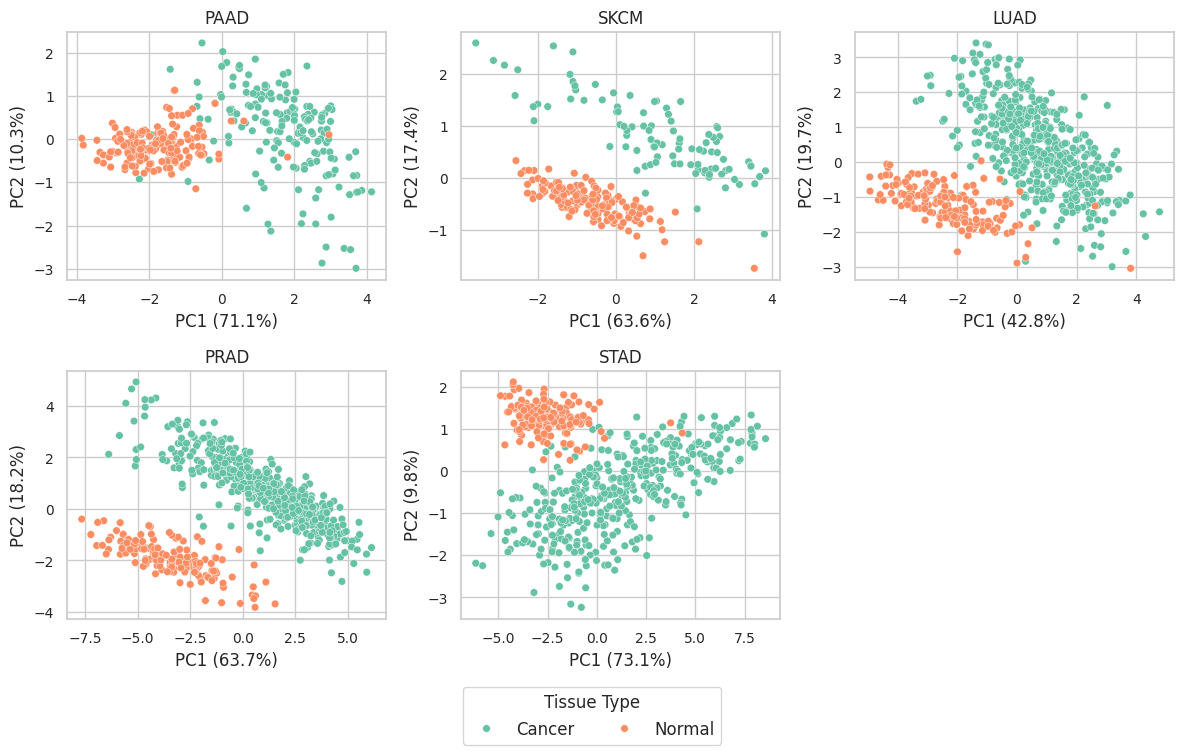

In [163]:
plot_pca_grid(pca_results_dict)

In [148]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_km_grid(cancer_plot_files):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes = axes.flatten()

    for i, (cancer, img_path) in enumerate(cancer_plot_files.items()):
        if i >= len(axes):
            break
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis("off")
        # axes[i].set_title(cancer, fontsize=12)

    for j in range(len(cancer_plot_files), 2):
        axes[j].axis("off")

    fig.suptitle("Kaplan-Meier Survival Curves by PC3 (High vs Low)", fontsize=12)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("../project/dsmp-2024-groupm22/plots/kaplan_grid_plot.png", dpi=300, bbox_inches='tight')
    plt.show()


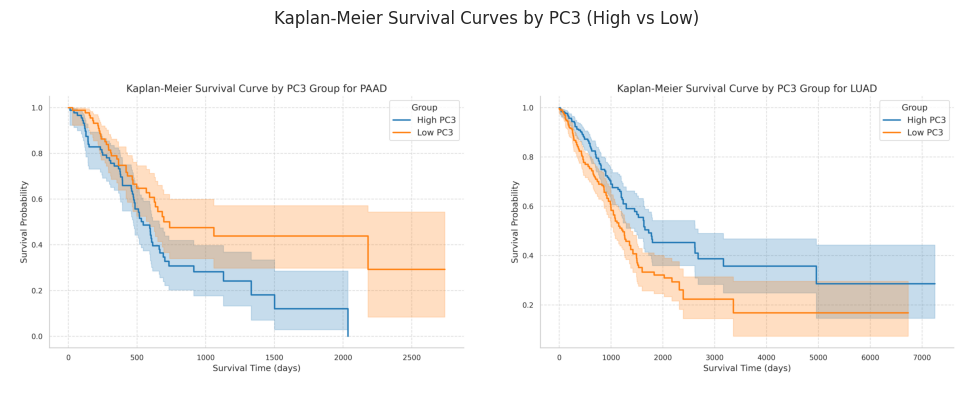

In [149]:
plot_km_grid({"PAAD": "../project/dsmp-2024-groupm22/plots/PAAD_PC3_KaplanMeier_plot_seaborn.png", "LUAD": "../project/dsmp-2024-groupm22/plots/LUAD_PC3_KaplanMeier_plot_seaborn.png"})

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, statistics

def kaplan_meier_grid(cox_df_dict):
    sns.set(style="whitegrid")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust 1x2 based on your number of cancers
    axes = axes.flatten()

    handles = []
    labels = []

    for i, (keyword, cox_df) in enumerate(cox_df_dict.items()):
        if i >= len(axes):
            break
        
        ax = axes[i]

        # Split into high and low PC3 groups
        cox_df['PC3_group'] = ['High' if x >= cox_df['PC3'].median() else 'Low' for x in cox_df['PC3']]
        high_group = cox_df[cox_df['PC3_group'] == 'High']
        low_group = cox_df[cox_df['PC3_group'] == 'Low']

        # Kaplan-Meier fitting
        kmf_high = KaplanMeierFitter()
        kmf_low = KaplanMeierFitter()

        kmf_high.fit(high_group['time'], event_observed=high_group['event'], label="High PC3")
        kmf_low.fit(low_group['time'], event_observed=low_group['event'], label="Low PC3")

        kmf_high.plot_survival_function(ax=ax, ci_show=True, linewidth=2, color="#1f77b4")
        kmf_low.plot_survival_function(ax=ax, ci_show=True, linewidth=2, color="#ff7f0e")
        
        # Title and axes
        ax.set_title(f"{keyword}", fontsize=14)
        ax.set_xlabel("Survival Time (days)", fontsize=14)
        ax.set_ylabel("Survival Probability", fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)

        # Collect legend handles only once
        if not handles:
            handles, labels = ax.get_legend_handles_labels()
        
        ax.legend_.remove()  # Remove individual legends

    # Turn off empty axes if needed
    for j in range(len(cox_df_dict), len(axes)):
        axes[j].axis("off")

    # Global legend
    fig.legend(handles, labels, title="PC3 Group", loc='lower center', ncol=2, fontsize=12, title_fontsize=12)
    
    fig.tight_layout(rect=[0, 0.08, 1, 0.95])
    plt.savefig("../project/dsmp-2024-groupm22/plots/kaplan_grid_plot_seaborn.png", dpi=300, bbox_inches='tight')
    plt.show()


In [175]:
cox_df_dict = {"PAAD": PAAD_cox_df, "LUAD": LUAD_cox_df}

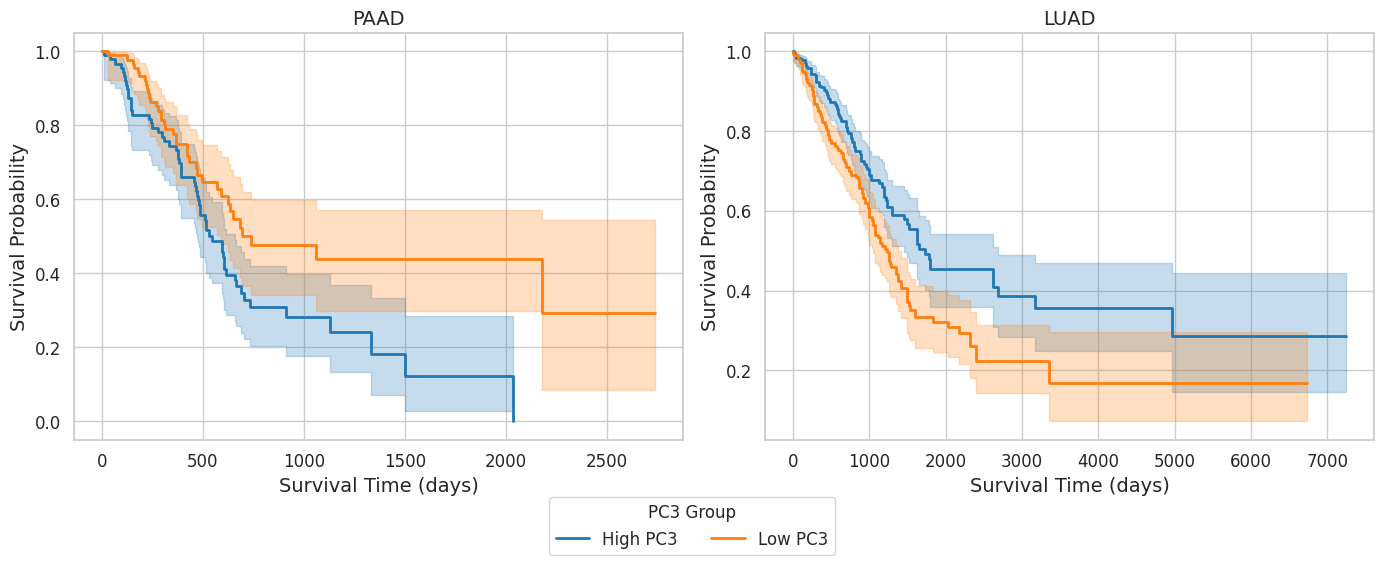

In [176]:
kaplan_meier_grid(cox_df_dict)